# Using Linear Discriminant Analysis for Quantitative Portfolio Management

In this post we will learn about linear discriminant analysis and how it can be used within quantitative portfolio management. We will briefly review what linear discriminant analysis is and apply it to managing the risk of a quantitative portfolio.

# What is Linear Discriminant Analysis

Before we jump into LDA, let's briefly discuss "Why Machine Learning?". I mean what's the purpose of it and what are we really trying to do? It is easy to overlook the purpose and intent of machnine learning amid the recent buzz around using it and abstraction of models offered by APIs.

The reason that we use machine or statistical learning is to make inferences and predictions. In short, we want to know more about the population of some specific data or domain. In most cases, the population isn't something that we can observe completely, or is continuous in statistical jargon. There exists some function, $\large f(x)$ that describes the nature and relationship between explanatory and dependent variables within some space. Recall that the probability of a continuous random variable is infinity, $\large \infty$, outside of some interval, $\large a<y<b$. Intuitively this is saying that we can't determine the exact $\large f(x)$ of the population. Thus, in machine learning, we are trying to approximate the population's $\large f(x)$. We do this by getting samples or looking at some data over some interval. 

Bearing in mind the fact that our sample is only a fragment of the total population and we desire to approximate $\large f(x)$ as closely as possible, a key question is how do we know that what we've observed from this fragment of the population is actually representative of the population. In other words, how do we know that this observation isn't just random. This is the purpose of hypothesis testing and why we compute test statistics and p-values.

Linear Discriminant Analysis, also known as LDA, is a supervised machine learning algorithm that can be used as a classifier and is most commonly used to achieve dimensionality reduction. To get an idea of what LDA is seeking to achieve, let's briefly review linear regression. Linear regression is a parametric, supervised learning model. The goal of linear regression is to predict a quantitative response, or label. We seek to achieve this by building a linear model that can take in a single or various parameter(s) or predictor(s). These predictors can be quantitative, or numerical and or qualitative or categorical.

Unlike in linear regression, where we seek to construct a model to predict a specific quantitative response, in LDA our goal is to predict a qualitative response, or a class label. An example of this is constructing a model to predict the direction of an  asset rather than one, in linear regression terms, that would predict the actual price of the asset. More specifically, LDA would seek to predict the probability of the direction.

So how does the algorithm work? 

Linear Discriminant Analysis seeks to solve the following equation:

$$\LARGE Pr(Y=k \mid X=x)$$

This equation may look familiar if you have learned Logistic Regression. It represents the conditional probability of the $\large K_{th}$ class given $\large x$ or our predictor.

You may be thinking that if Logisitic Regression and LDA are both attempting to find the conditional probability of an observation falling within a specific class, or $\large k$, given a value for $\large x$, or our predictor, why wouldn't we just use Logistic Regression? 

In short, Logistic Regression works well when our class, or qualitative response, is binary, for example, is either 1 or 0, or True or False. But, when we work with data in which our class may have more than two possible states, LDA can provide a better alternative. Also, LDA may give us a better prediction when there is a high degree of separability between our class and given other conditions, can be more stable than Logistic Regression.

Though LDA seeks to solve the same equation as that used in Logistic Regression, it does so in a completely different way. In Logistic Regression, we directly calculate the conditional probability provided above. We calculate our coefficients by using maximum likelihood. We then plug our coefficients into the logistic function to derive our conditional probability. The logistic function is shown below:

$$\LARGE e^{\hat{B_0}+\hat{B_1}x} \over \LARGE 1+e^{\hat{B_0}+\hat{B_1}x}$$

Instead of using maximum likelihood and the logistic function, LDA seeks to solve the conditional probability equation using Baye's Theorem. 

The equation for Baye's Theorem applied to LDA can be seen below:

$$\LARGE Pr(Y=k\mid X=x)= {\pi_k \: f_k(x)\over \sum{_{i=1}^N} \pi_i \: f_i(x)}$$

where $\large \pi_k$ is the prior probability that a $\large Y$ or a random observation comes from the $\large 
k$th class, and $\large f_k(x)$ is the likelihood, or the probability of our $ \large x$ coming from the $ \large k_{th}$ class. The denominator is the marginal probability.

The prior probability, $\large \pi_k$ is faily simple to compute and can be achieved by calculating the fractional probability of the $\large k_{th}$ class. However, the likelihood function, $\large f_k(x)$ is a bit more involved.

Ultimately we transfrom the equation above into the discriminant equation below:

$$ \LARGE \delta_k (x)= \rm x \ { \mu_k \over \sigma^2} - { {\mu_k^2} \over 2\sigma^2} + \log(\pi_k)$$ 

The discriminant equation, $ \large \delta_k (x)= \rm x \ { \mu_k \over \sigma^2} - { {\mu_k^2} \over 2\sigma^2} + \log(\pi_k) $, is equivalent to the conditional probability equation, $\large Pr(Y=k\mid X=x)$.

 In our new equation, $\large x$ is our predictor or feature (note: this derivation is based on using only 1 feature), $\large \mu_k$ is the mean of the $\large k_{th}$ class or response, $\large \sigma^2$, is the collective variance of all distributions, and $\large \pi_k $ is our prior probability.

You may be wondering what I mean by collective variance. LDA, in order to calculate the likelihood, must assume some probability density function. The model assumes a Gaussian distribution. This means that the model is going to create a separate distribution of $\large x$ for each $\large k_n $ classes and each will have their own $\large \mu$ but share a $\large \sigma^2$

So in short, when we fit our model, it has to create separate probability distributions for each $ \large k_n$ class and estimate the values of $\large \mu_k$, $\large \sigma^2$, and $\large \pi_k$, and plug these into the discriminate equation (note: this is if p=1, you're using 1 predictor; otherwise the equation would change a bit to account for multiple predictors) in order to compute our probability, or classify our data.

# Let's Define Our Problem Statement

Now that we've gotten a brief overview of LDA, let's define our problem. We will assume that we are managing a quantitative portfolio of Statistical Arbitrage strategies. A major concern that we have is the maximum loss that we could expect to lose at any given time.

We calculate our VaR, or Value at Risk, and understand with 95% confidence the level where our returns should not drop below. But what about the other 5%, or the tail risk?

The tail risk is a major concern with VaR analysis. Intuitively speaking, though we know that our returns may fall beneath some threshold 5% of the time, what concerns us is that we don't know exactly where within that 5% interval we can expect our returns to fall. What is the maximum loss we can expect within this 5% tail?

To tackle this problem, we will build a quantitative portfolio of Statistical Arbitrage strategies. We will use pairs within the S&P 500 created using K-Means in an early article found here:https://www.quantinsti.com/blog/k-means-clustering-pair-selection-python/.

Once we construct our portfolio, we will create our VaR and Monte Carlo and analyze the results. We will then build an LDA model that can help us better understand the probability of returns within a certain range beneath our VaR. This will help us better understand our risk, and thus manage our quantitative portfolio.

Let's get started!

# Building Our Quantitative Portfolio

We will port over our statarb class from our series on K-Means. We will use stocks we found in the first cluster of that analysis to create our Statistical Arbitrage portfolio.

In [57]:
class statarb(object):
    
     def __init__(self,df1, df2,ma,floor, ceiling,beta_lookback,start,end,exit_zscore=0):
        #setting the attributes of the data cleaning object
        self.df1=df1 #the complete dataframe of X
        self.df2=df2 # the comlete dataframe of Y
        self.df=pd.DataFrame(index=df1.index) #creates a new dataframe in the data_cleaning method
        self.ma=ma# the moving average period for the model
        self.floor=floor #the buy threshold for the z-score
        self.ceiling=ceiling #the sell threshold for the z-score
        self.Close='Close Long'  #used as close signal for longs
        self.Cover='Cover Short' #used as close signal for shorts
        self.exit_zscore=exit_zscore  #the z-score
        self.beta_lookback=beta_lookback #the lookback of beta for hedge ratio
        self.start=start #the beginning of test period as a string
        self.end=end    # the end of test period as a string
        
     #create price spread
     def create_spread(self):
        
         #setting the new dataframe values for x and y of the closing 
         #prices of the two dataframes passed in
            
        self.df['X']=self.df1['Close']
        self.df['Y']=self.df2['Close']
           
        #calculating the beta of the pairs 
        self.df['cov']=pd.rolling_cov(self.df['X'],self.df['Y'],self.beta_lookback)
        self.df['var']=pd.rolling_var(self.df['Y'],self.beta_lookback)
        self.df['beta']=self.df['cov']/self.df['var']
        
        #setting the hedge ratio
        self.df['Hedge Ratio']=self.df['beta']
        
        self.df['Spread']=self.df['X']-(self.df['Hedge Ratio']*self.df['Y'])
        self.df['Spread2']=self.df['Y']-(self.df['Hedge Ratio']*self.df['X'])
            
            
        return self.df
    
     #check for cointegration
     def check_for_cointegration(self):
         coint=adfuller(self.df['Spread'].dropna())
         #writing conditional that states print out 
         #cointegrated if the t-statistic passes the 
         #critical value test
         if coint[0] < coint[4]['1%']:
             print('Spread is Cointegrated at 99% Confidence Interval')
         elif coint[0] < coint[4]['5%']:
             print('Spread is Cointegrated at 95% Confidence Interval')
         elif coint[0] < coint[4]['10%']:
             print('Spread is Cointegrated at the 90% Confidence Interval')
         else:
             print('Spread is not Cointegrated')
             
             
         return
            
     def generate_signals(self):
           
            
            #creating the z-score
            self.df['Z-Score']=(self.df['Spread']-self.df['Spread'].rolling(window=self.ma).mean())
            self.df['Spread'].rolling(window=self.ma).std()
            
            #prior z-score
            self.df['Prior Z-Score']=self.df['Z-Score'].shift(1)
            
            #Creating Buy and Sell Signals; when to be long, short, exit
            
            self.df['Long Signal']=(self.df['Z-Score']<=self.floor)*1.0 #buy the spread
            self.df['Short Signal']=(self.df['Z-Score']>=self.ceiling)*1.0 #short the spread
            self.df['Exit']=(self.df['Z-Score']<=self.exit_zscore)*1.0
            
            #tracking our positions
            self.df['In Long']=0.0
            self.df['In Short']=0.0
            
            #variables that track if we enter market 
            self.enter_long=0
            self.enter_short=0
            
            #signal generator
            for i,value in enumerate(self.df.iterrows()):
                #longs
                if value[1]['Long Signal']==1.0:
                    self.enter_long=1
                #shorts    
                if value[1]['Short Signal']==1.0:
                    self.enter_short=1
                    
                if value[1]['Exit']==1.0:
                    
                    self.enter_long=0
                    self.enter_short=0
                    
                self.df.iloc[i]['In Long']=self.enter_long
                self.df.iloc[i]['In Short']=self.enter_short                   
            
            return self.df                    
        
     def create_returns(self, allocation,pair_name):
        
        self.allocation=allocation
        self.pair=pair_name
         
        self.portfolio=pd.DataFrame(index=self.df.index)
        self.portfolio['Positions']=self.df['Long Signal']-self.df['Short Signal']
        self.portfolio['X']=-1.0*self.df['X']*self.portfolio['Positions']
        self.portfolio['Y']=self.df['Y']*self.portfolio['Positions']
        self.portfolio['Total']=self.portfolio['X']+self.portfolio['Y']
        
        
        #creating a percentage return stream
        self.portfolio['Returns']=self.portfolio['Total'].pct_change()
        self.portfolio['Returns'].fillna(0.0,inplace=True)
        self.portfolio['Returns'].replace([np.inf,-np.inf],0.0,inplace=True)
        self.portfolio['Returns'].replace(-1.0,0.0,inplace=True)
        
        
        #calculating the mu,sigma,sharpe;wins and losses
        self.mu=(self.portfolio['Returns'].mean())
        self.sigma=(self.portfolio['Returns'].std())
        self.Sharpe=(self.mu-0.005)/self.sigma
        self.portfolio['Win']=np.where(self.portfolio['Returns']>0,1,0)
        self.portfolio['Loss']=np.where(self.portfolio['Returns']<0,1,0)
        self.wins=self.portfolio['Win'].sum()
        self.losses=self.portfolio['Loss'].sum()
        self.total_trades=self.wins+self.losses
        
        #win loss ratio; ie hit ratio
        self.win_loss_ratio=(self.wins/self.losses)
        
        #probability of win
        self.prob_of_win=(self.wins/self.total_trades)
        #probability of loss
        self.prob_of_loss=(self.losses/self.total_trades)
        
        #average return of wins
        self.avg_win_return=(self.portfolio['Returns']>0).mean()
        #average returns of losses
        self.avg_loss_return=(self.portfolio['Returns']<0).mean()
        #calculating payout ratio
        self.payout_ratio=(self.avg_win_return/self.avg_loss_return)
        
                   
        #calculating equity curve
        self.portfolio['Returns']=(self.portfolio['Returns']+1.0).cumprod()
        self.portfolio['Trade Returns']=(self.portfolio['Total'].pct_change()) #non cumulative Returns
        self.portfolio['Portfolio Value']=(self.allocation*self.portfolio['Returns'])
        self.portfolio['Portfolio Returns']=self.portfolio['Portfolio Value'].pct_change()
        self.portfolio['Initial Value']=self.allocation
        
        with plt.style.context(['bmh','seaborn-paper']):
            #Plotting Portfolio Value
            plt.plot(self.portfolio['Portfolio Value'])
            plt.plot(self.portfolio['Initial Value'])
            plt.title('StatArb Pair%s Strategy Returns %s to %s'%(self.pair,self.start,self.end))
            plt.legend(loc=0)
            plt.tight_layout()
            plt.show()               
    
        return


Now that we have our strategy class, let's import our libraries.

In [4]:
#data analysis/manipulation libraries
import numpy as np
import pandas as pd

#data gathering library
import pandas_datareader as pdr

#data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

To recap, our K-Means algorithm identified 9 stocks within Cluster 0. We will import those stocks and create different combinations of them, check them for cointegration, and if the ADF test is positive, we will add them to our Statistical Arbitrage Portfolio.

Let's import our stocks. We'll get our data over the period of 2017-2018.

In [5]:
#setting start and end dates
start='2017-01-01'
end='2018-01-01'

#assigning our stocks
aiz=pdr.get_data_yahoo('AIZ',start, end)
an=pdr.get_data_yahoo('AN',start,end)


In [6]:
sig=pdr.get_data_yahoo('SIG',start,end)
kors=pdr.get_data_yahoo('KORS',start,end)

In [7]:
bbby=pdr.get_data_yahoo('BBBY',start, end)
gt=pdr.get_data_yahoo('GT',start,end)


In [8]:
navi=pdr.get_data_yahoo('NAVI',start,end)
pvh=pdr.get_data_yahoo('PVH',start,end)


In [9]:
rig=pdr.get_data_yahoo('RIG',start,end)

Now that we have our data, let's briefly take a look at our dataframe. We'll use kors.

In [10]:
kors.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,42.779999,43.450001,42.099998,43.080002,43.080002,1929500
2017-01-04,43.200001,43.930000,43.200001,43.500000,43.500000,2147500
2017-01-05,42.650002,42.709999,40.810001,42.099998,42.099998,3695900
2017-01-06,42.180000,42.759998,42.119999,42.470001,42.470001,2562300
2017-01-09,42.439999,42.560001,41.849998,42.040001,42.040001,2137700


We can see that our dataframes contain the Open,High, Low, Close, Adj. Close and Volume columns. Let's plot the price of our data over our sample period.

Let's create a plot function to plot our data.

In [11]:
def plot_close(symbols):
        
        plt.figure(figsize=(10,6))
        plt.plot(symbols[symbol],label='Close')
        plt.legend(loc=0)
        plt.ylabel('Price')
        
        plt.title('%s Equity Curve from %s to %s' %(symbol.upper(),start,end))
        #plt.show()
        

We will create a dictionary to hold our symbols

In [12]:
symbols={'aiz':aiz['Close'],'an':an['Close'],'sig':sig['Close'],'kors':kors['Close'],'bbby':bbby['Close'],'gt':gt['Close'],'navi':navi['Close'],'pvh':pvh['Close'],'rig':rig['Close']}

We can now use our function to plot the closing prices of our symbols.

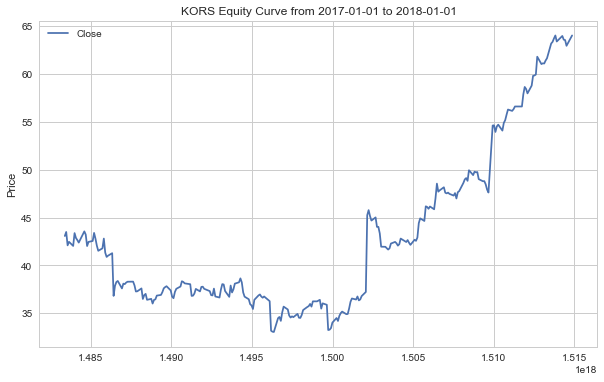

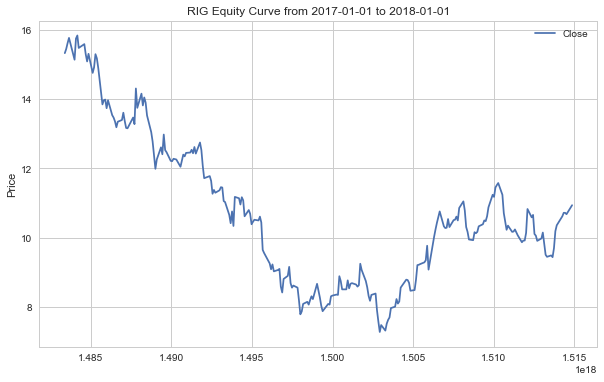

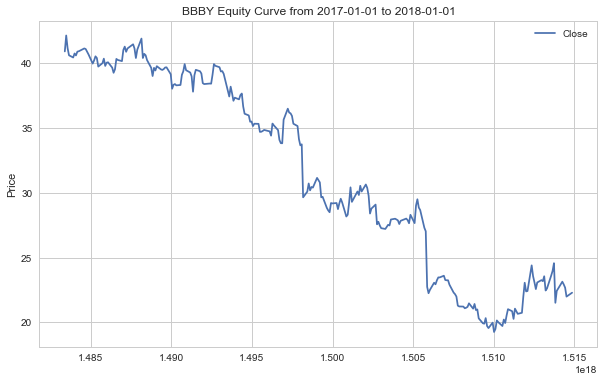

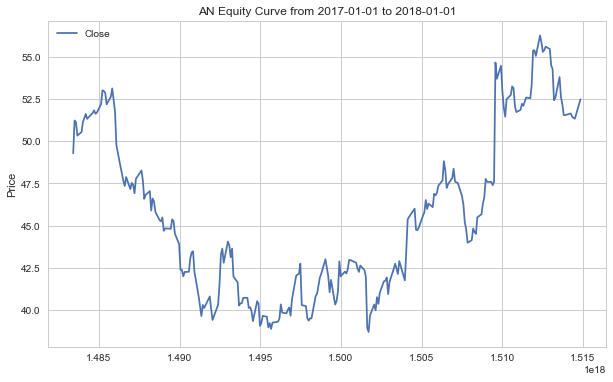

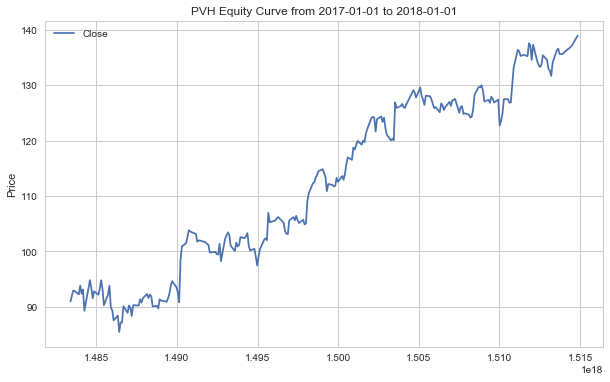

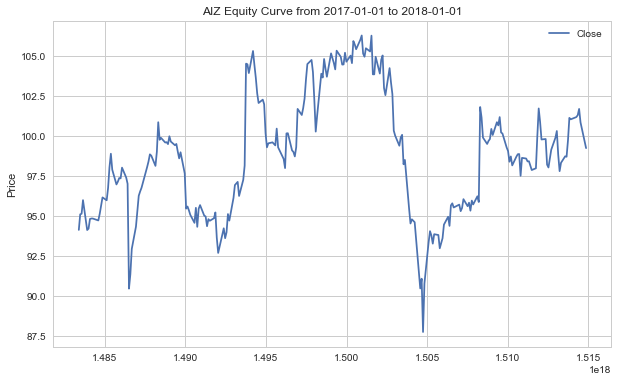

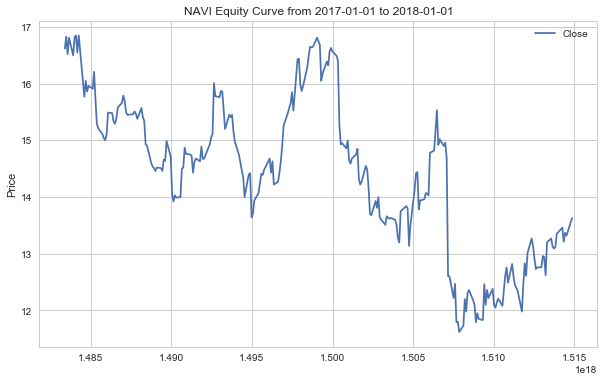

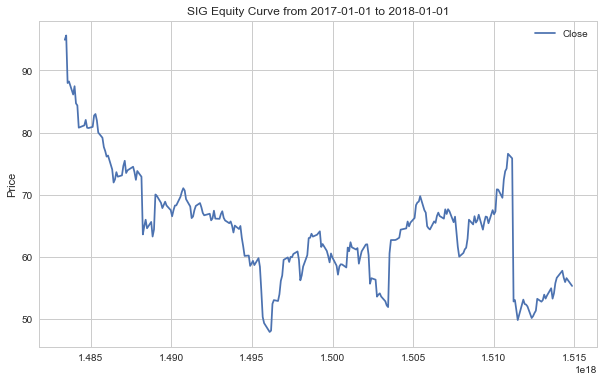

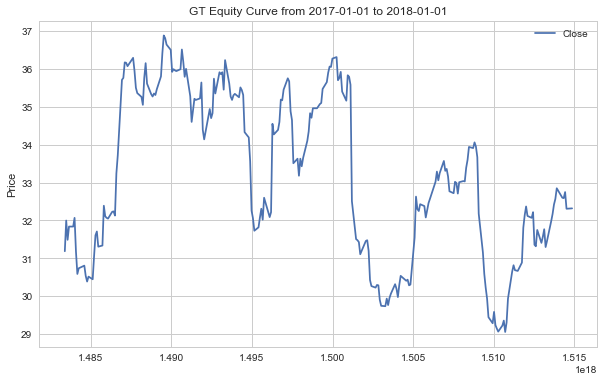

In [13]:
for count,symbol in enumerate(symbols):
    plot_close(symbols)

    


Now that we have visualized our data, we can begin creating our pairs so that we can conduct our ADF tests, and then build our Statistical Arbitrage portfolio. We have 9 different stocks from Cluster 0. Our objective is to create different combinations of these stocks and test them for cointegration. We can determine how many possible combinations there are by using the combination function below.

In [14]:
import math

In [15]:
def possible_combinations(n,k):
    
    combinations=math.factorial(n)/(math.factorial(k) *math.factorial((n-k)))
    
    return print(int(combinations),'Possible Combinations')


We know that we have 9 stocks which is our n and 2 is our k. Let's run our possible combinations function.

In [16]:
possible_combinations(9,2)

36 Possible Combinations


To identify all our possible combinations and check them for cointegration, we will begin by creating a list of our symbols. We will then create a function that will create all the possible pairs of our symbols using our symbol list. Afterwards, we can create a method to iterate over our symbols dictionary and pass in our symbol list and check each possible pair for cointegration.

Let's first create a list of our symbols.

In [17]:
symbolList=['aiz','an','sig','kors','bbby','gt','navi','rig','pvh']

Now lets create a method to create every possible pair from our symbolList.

In [18]:
#creating method to identify each possible pair 
def find_pairs(symbolList):
    #creating a list to hold each possible pair
    pairs=[]
    #intializing placeholders for the symbols in each pair
    x=0
    y=0
    for count,symbol in enumerate(symbolList):
        for nextCount,nextSymbol in enumerate(symbolList):
            x=symbol
            y=nextSymbol
            if x !=y:
                pairs.append([x,y])
            
    print('Length of Pairs List is:',len(pairs))
    return pairs

In [19]:
find_pairs(symbolList)

Length of Pairs List is: 72


[['aiz', 'an'],
 ['aiz', 'sig'],
 ['aiz', 'kors'],
 ['aiz', 'bbby'],
 ['aiz', 'gt'],
 ['aiz', 'navi'],
 ['aiz', 'rig'],
 ['aiz', 'pvh'],
 ['an', 'aiz'],
 ['an', 'sig'],
 ['an', 'kors'],
 ['an', 'bbby'],
 ['an', 'gt'],
 ['an', 'navi'],
 ['an', 'rig'],
 ['an', 'pvh'],
 ['sig', 'aiz'],
 ['sig', 'an'],
 ['sig', 'kors'],
 ['sig', 'bbby'],
 ['sig', 'gt'],
 ['sig', 'navi'],
 ['sig', 'rig'],
 ['sig', 'pvh'],
 ['kors', 'aiz'],
 ['kors', 'an'],
 ['kors', 'sig'],
 ['kors', 'bbby'],
 ['kors', 'gt'],
 ['kors', 'navi'],
 ['kors', 'rig'],
 ['kors', 'pvh'],
 ['bbby', 'aiz'],
 ['bbby', 'an'],
 ['bbby', 'sig'],
 ['bbby', 'kors'],
 ['bbby', 'gt'],
 ['bbby', 'navi'],
 ['bbby', 'rig'],
 ['bbby', 'pvh'],
 ['gt', 'aiz'],
 ['gt', 'an'],
 ['gt', 'sig'],
 ['gt', 'kors'],
 ['gt', 'bbby'],
 ['gt', 'navi'],
 ['gt', 'rig'],
 ['gt', 'pvh'],
 ['navi', 'aiz'],
 ['navi', 'an'],
 ['navi', 'sig'],
 ['navi', 'kors'],
 ['navi', 'bbby'],
 ['navi', 'gt'],
 ['navi', 'rig'],
 ['navi', 'pvh'],
 ['rig', 'aiz'],
 ['rig', 'an'],
 

Okay Great! We have 36 possible combinations. We can technically create a completely different spread if we invert our X and Y within our pairs. When accounting for this in our symbolList, being able to create each combination pair with each symbol being both X and Y, we get 36 * 2 possibilities or 72 possibilities. This number is equal to the length of our pairs from our find pairs function.

We can now store our pairs in a variable so that we can access them and check for cointegration.

In [20]:
pairs=find_pairs(symbolList)

Length of Pairs List is: 72


Now let's find out which pairs are cointegrated. We can achieve this by creating a method that will take in our symbols dictionary and pairs. We will iterate over our pairs list, test for cointegration, and then store the pairs that are cointegrated.

Let's import our ADF test to check for cointegration.

In [21]:
from statsmodels.tsa.api import adfuller

C:\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Now let's create our function for checking our pairs for cointegration.

In [22]:
def test_pairs(symbols,pairs):
    cointegrated_pairs=[]
    for count,pair in enumerate(pairs):
        spread=symbols[pair[0]]-symbols[pair[1]]
        adf_test=adfuller(spread.dropna())
        if adf_test[0] < adf_test[4]['10%']:
               cointegrated_pairs.append([pair[0],pair[1]])
    return cointegrated_pairs

We're going to store our function in a variable so that we have access to our cointegrated_pairs list.

In [23]:
#initialzing our variable as our function
cointegrated=test_pairs(symbols,pairs)


Now let's check our cointegrated variable to see our list of cointegrated pairs.

In [24]:
#checking our cointegrated variable
cointegrated

[['aiz', 'sig'],
 ['aiz', 'navi'],
 ['an', 'sig'],
 ['sig', 'aiz'],
 ['sig', 'an'],
 ['sig', 'bbby'],
 ['sig', 'gt'],
 ['sig', 'navi'],
 ['sig', 'rig'],
 ['bbby', 'sig'],
 ['gt', 'sig'],
 ['gt', 'navi'],
 ['gt', 'rig'],
 ['navi', 'aiz'],
 ['navi', 'sig'],
 ['navi', 'gt'],
 ['rig', 'sig'],
 ['rig', 'gt']]

Now that we have found which pairs are cointegrated over our test period, we can use our statarb class to create our strategy. We'll use both combinations of the pairs we've found to be cointegrated.

Let's begin writing a function that will allow us to create our StatArb strategy for each of our cointegrated pairs.

In [25]:
def generate_portfolio_returns(cointegrated):
    for pair in cointegrated:
        test=statarb(eval(pair[0]),eval(pair[1]),30,-1.5,1.5,30,start,end)
        test.create_spread()
        test.generate_signals()
        test.create_returns(100000,'%s_%s'%(pair[0].upper(),pair[1].upper()))


Now that we have our function, let's pass in our nested list of pairs and compute their returns.

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:28: FutureWarning: pd.rolling_cov is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30).cov(other=<Series>)
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: FutureWarning: pd.rolling_var is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).var()


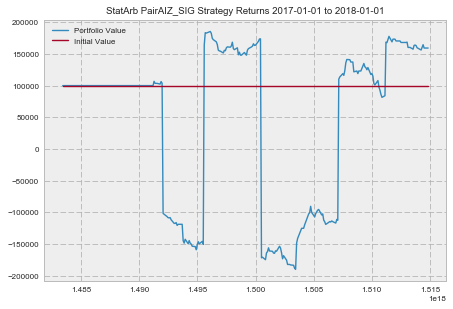

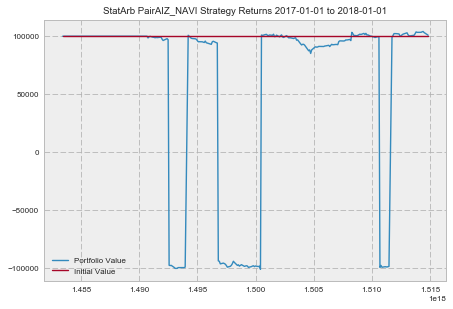

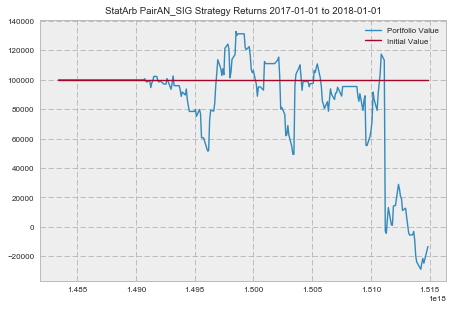

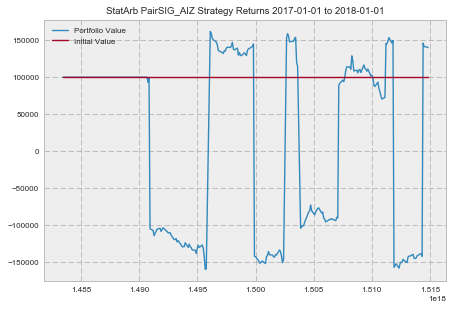

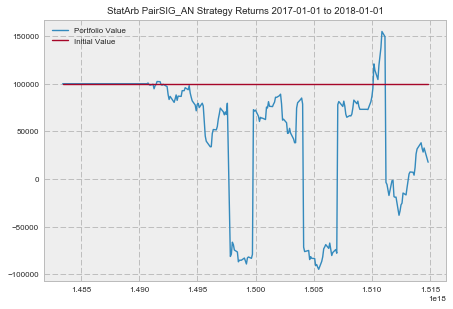

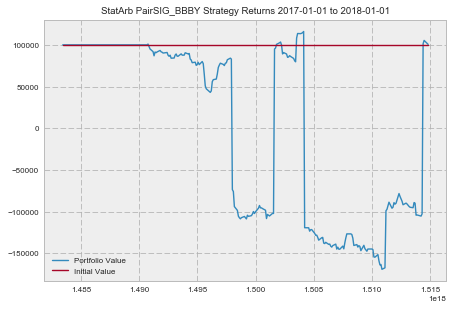

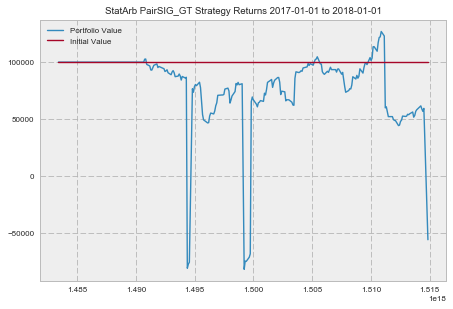

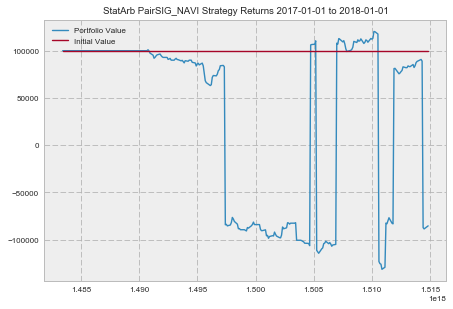

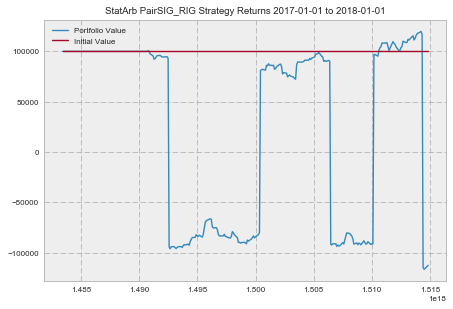

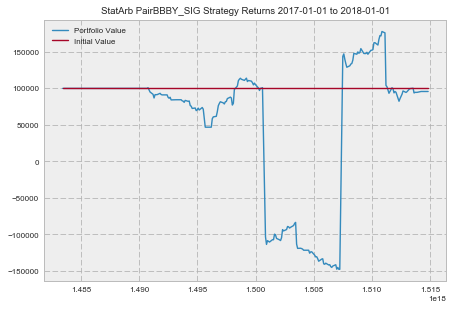

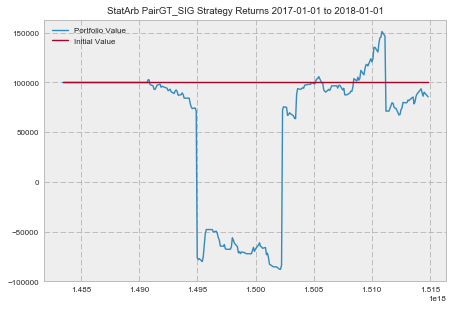

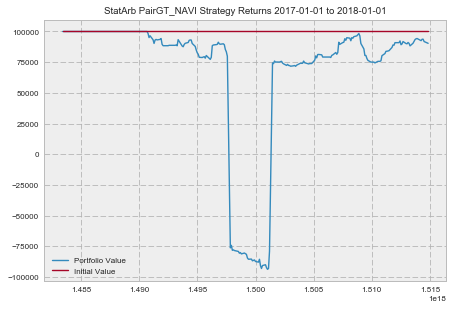

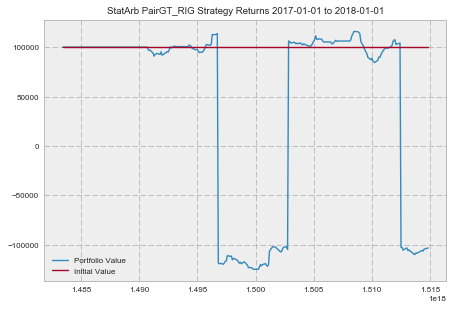

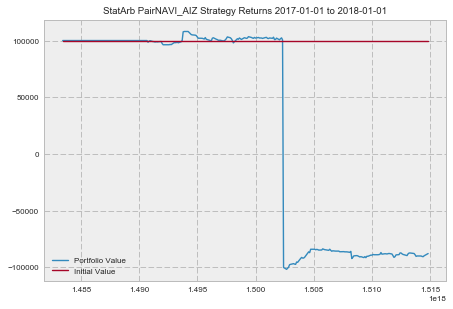

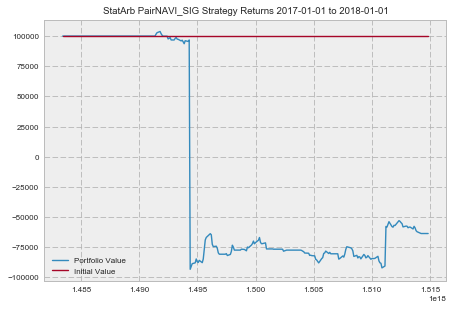

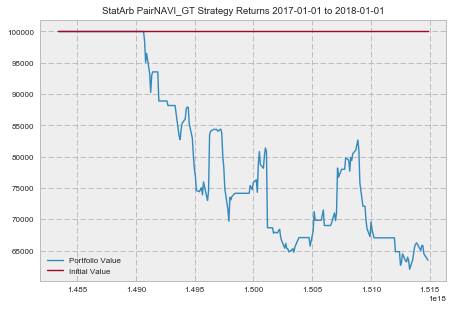

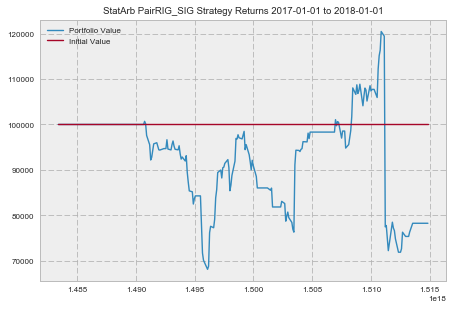

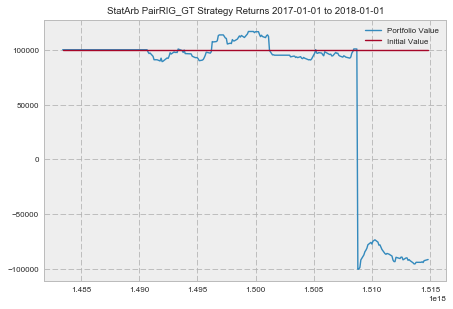

In [26]:
generate_portfolio_returns(cointegrated)

After scrolling through the equity curves of our pairs, we can see the need to optimize our parameters in an effort to improve our performance. We can create a function that will allow us to find an optimal value for our parameters so that we can generate the best total performance. In practice we would perform this for each of our pairs, but here we'll just use the first pair.

In [27]:
def optimize_strategy_lookback(ma1,ma2,X,Y):
    for i in range(ma1,ma2):
        test=statarb(eval(X),eval(Y),i,-1.5,1.5,i,start,end)
        test.create_spread()
        test.generate_signals()
        test.create_returns(100000,'%s_%s MA:%s'%(X.upper(),Y.upper(),i))

Now that we have our parameter optimizer function, let's apply it to the first pair in our pair list.

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:28: FutureWarning: pd.rolling_cov is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=40).cov(other=<Series>)
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: FutureWarning: pd.rolling_var is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=40,center=False).var()


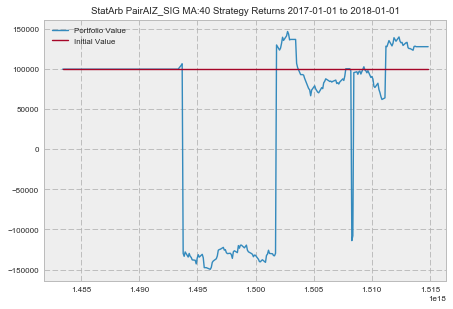

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:28: FutureWarning: pd.rolling_cov is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=41).cov(other=<Series>)
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: FutureWarning: pd.rolling_var is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=41,center=False).var()


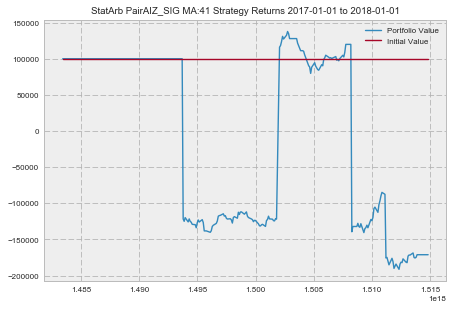

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:28: FutureWarning: pd.rolling_cov is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=42).cov(other=<Series>)
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: FutureWarning: pd.rolling_var is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=42,center=False).var()


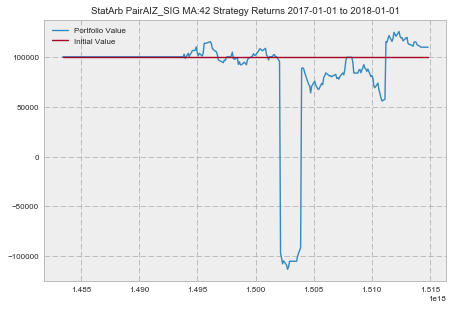

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:28: FutureWarning: pd.rolling_cov is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=43).cov(other=<Series>)
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: FutureWarning: pd.rolling_var is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=43,center=False).var()


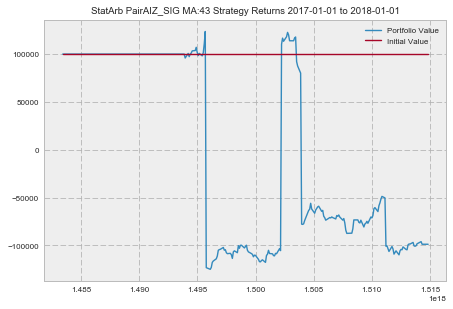

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:28: FutureWarning: pd.rolling_cov is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=44).cov(other=<Series>)
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: FutureWarning: pd.rolling_var is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=44,center=False).var()


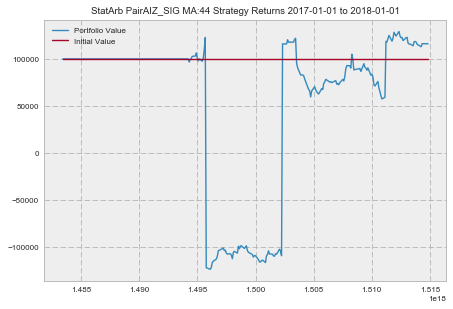

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:28: FutureWarning: pd.rolling_cov is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=45).cov(other=<Series>)
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: FutureWarning: pd.rolling_var is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=45,center=False).var()


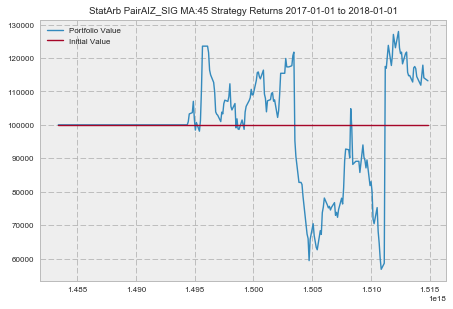

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:28: FutureWarning: pd.rolling_cov is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=46).cov(other=<Series>)
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: FutureWarning: pd.rolling_var is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=46,center=False).var()


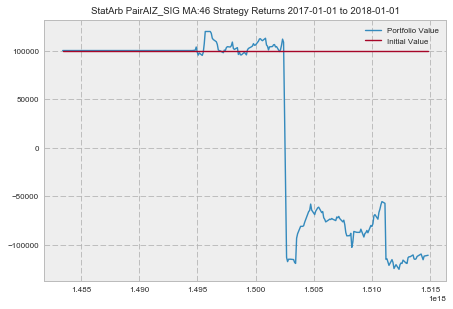

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:28: FutureWarning: pd.rolling_cov is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=47).cov(other=<Series>)
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: FutureWarning: pd.rolling_var is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=47,center=False).var()


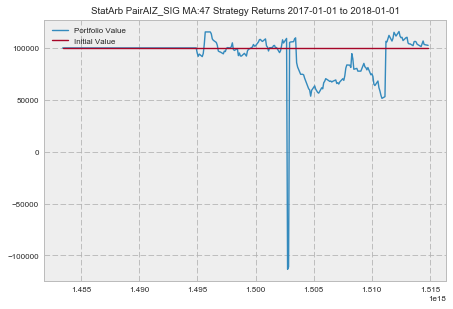

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:28: FutureWarning: pd.rolling_cov is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=48).cov(other=<Series>)
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: FutureWarning: pd.rolling_var is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=48,center=False).var()


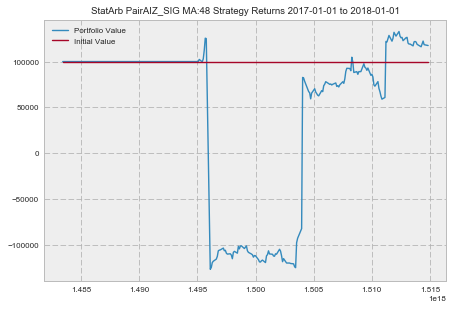

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:28: FutureWarning: pd.rolling_cov is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=49).cov(other=<Series>)
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: FutureWarning: pd.rolling_var is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=49,center=False).var()


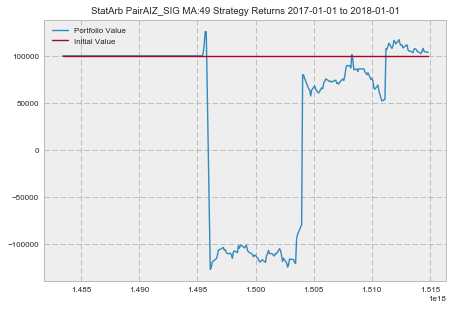

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:28: FutureWarning: pd.rolling_cov is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50).cov(other=<Series>)
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: FutureWarning: pd.rolling_var is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).var()


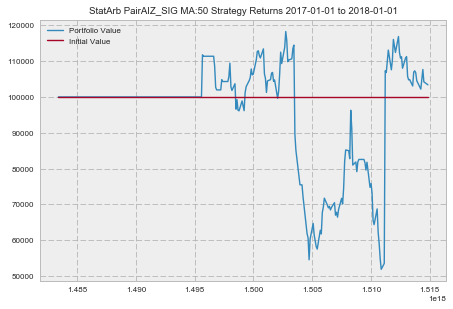

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:28: FutureWarning: pd.rolling_cov is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=51).cov(other=<Series>)
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: FutureWarning: pd.rolling_var is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=51,center=False).var()


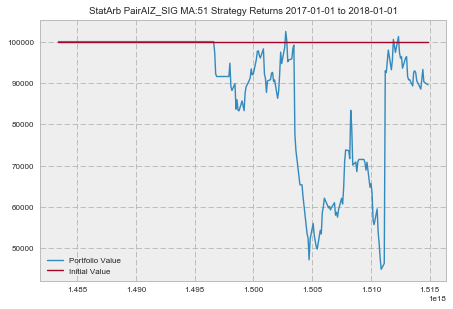

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:28: FutureWarning: pd.rolling_cov is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=52).cov(other=<Series>)
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: FutureWarning: pd.rolling_var is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=52,center=False).var()


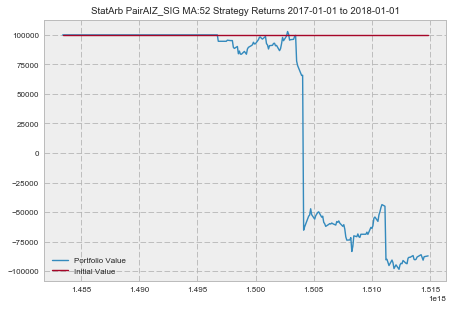

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:28: FutureWarning: pd.rolling_cov is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=53).cov(other=<Series>)
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: FutureWarning: pd.rolling_var is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=53,center=False).var()


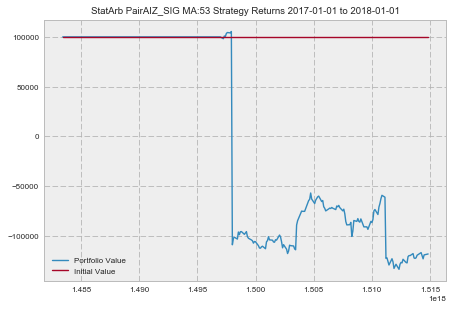

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:28: FutureWarning: pd.rolling_cov is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=54).cov(other=<Series>)
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: FutureWarning: pd.rolling_var is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=54,center=False).var()


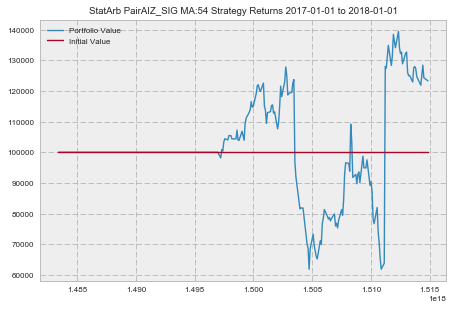

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:28: FutureWarning: pd.rolling_cov is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=55).cov(other=<Series>)
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: FutureWarning: pd.rolling_var is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=55,center=False).var()


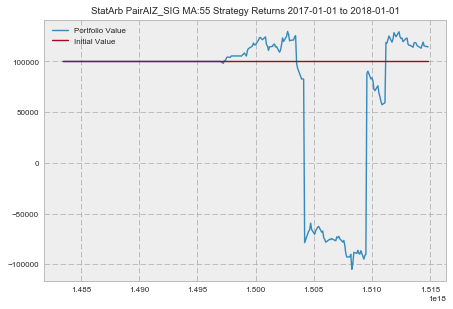

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:28: FutureWarning: pd.rolling_cov is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=56).cov(other=<Series>)
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: FutureWarning: pd.rolling_var is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=56,center=False).var()


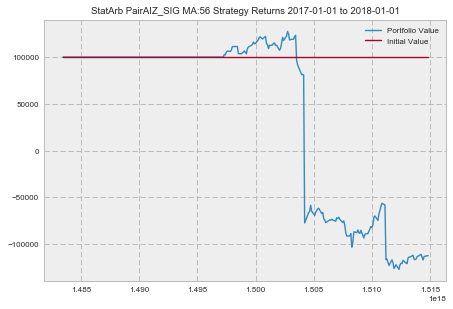

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:28: FutureWarning: pd.rolling_cov is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=57).cov(other=<Series>)
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: FutureWarning: pd.rolling_var is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=57,center=False).var()


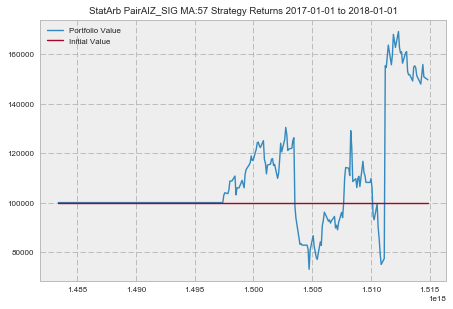

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:28: FutureWarning: pd.rolling_cov is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=58).cov(other=<Series>)
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: FutureWarning: pd.rolling_var is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=58,center=False).var()


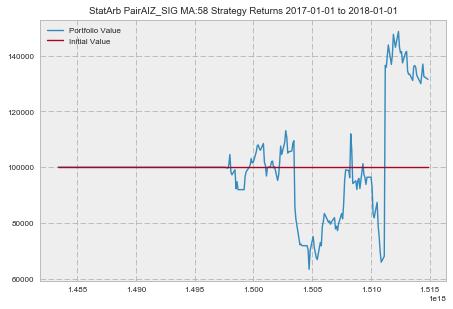

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:28: FutureWarning: pd.rolling_cov is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=59).cov(other=<Series>)
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: FutureWarning: pd.rolling_var is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=59,center=False).var()


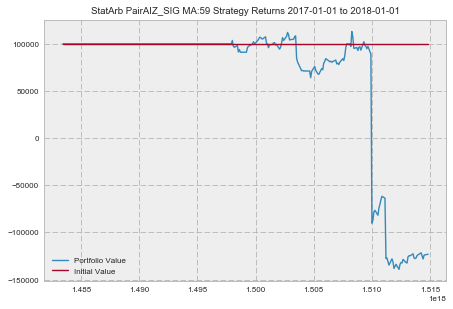

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:28: FutureWarning: pd.rolling_cov is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=60).cov(other=<Series>)
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: FutureWarning: pd.rolling_var is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=60,center=False).var()


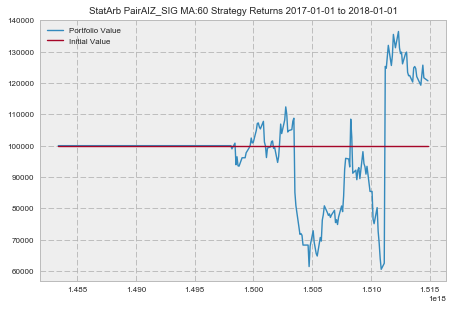

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:28: FutureWarning: pd.rolling_cov is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=61).cov(other=<Series>)
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: FutureWarning: pd.rolling_var is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=61,center=False).var()


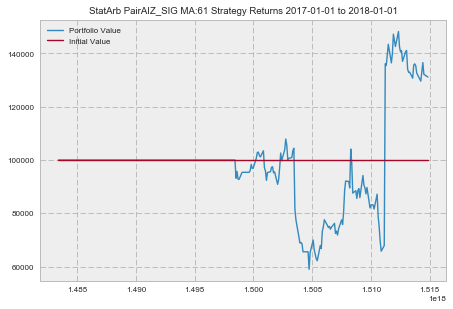

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:28: FutureWarning: pd.rolling_cov is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=62).cov(other=<Series>)
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: FutureWarning: pd.rolling_var is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=62,center=False).var()


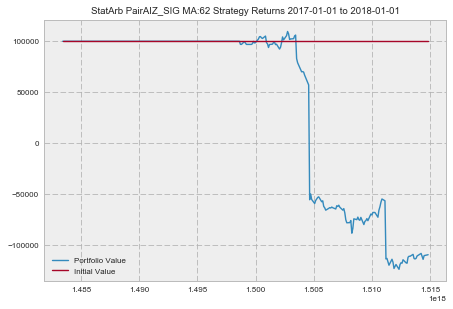

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:28: FutureWarning: pd.rolling_cov is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=63).cov(other=<Series>)
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: FutureWarning: pd.rolling_var is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=63,center=False).var()


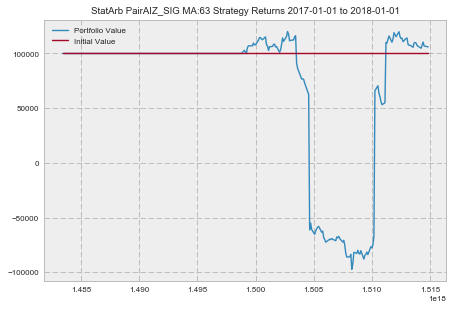

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:28: FutureWarning: pd.rolling_cov is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=64).cov(other=<Series>)
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: FutureWarning: pd.rolling_var is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=64,center=False).var()


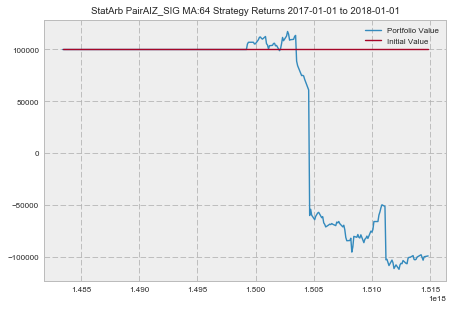

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:28: FutureWarning: pd.rolling_cov is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=65).cov(other=<Series>)
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: FutureWarning: pd.rolling_var is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=65,center=False).var()


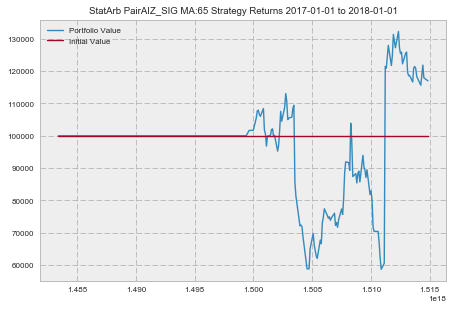

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:28: FutureWarning: pd.rolling_cov is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=66).cov(other=<Series>)
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: FutureWarning: pd.rolling_var is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=66,center=False).var()


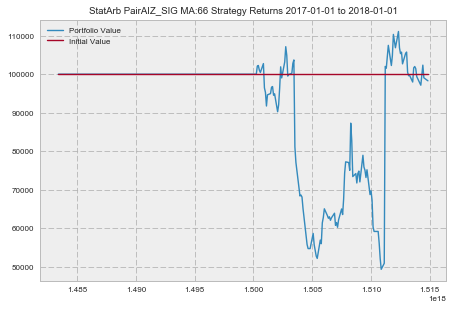

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:28: FutureWarning: pd.rolling_cov is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=67).cov(other=<Series>)
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: FutureWarning: pd.rolling_var is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=67,center=False).var()


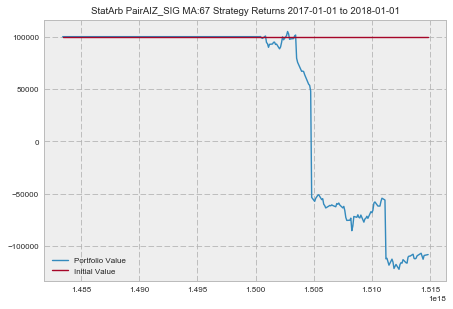

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:28: FutureWarning: pd.rolling_cov is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=68).cov(other=<Series>)
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: FutureWarning: pd.rolling_var is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=68,center=False).var()


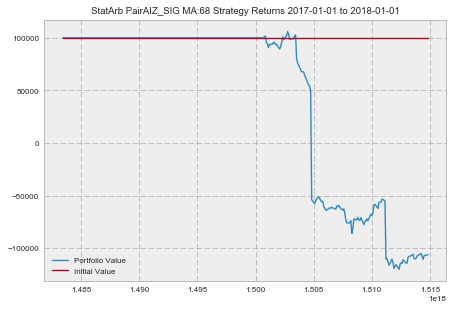

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:28: FutureWarning: pd.rolling_cov is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=69).cov(other=<Series>)
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: FutureWarning: pd.rolling_var is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=69,center=False).var()


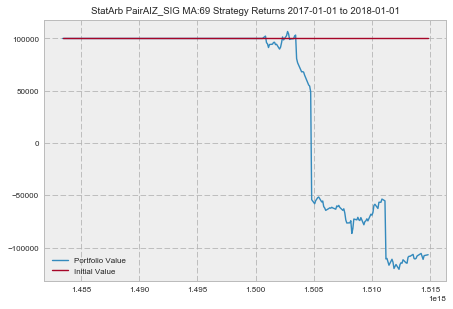

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:28: FutureWarning: pd.rolling_cov is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=70).cov(other=<Series>)
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: FutureWarning: pd.rolling_var is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=70,center=False).var()


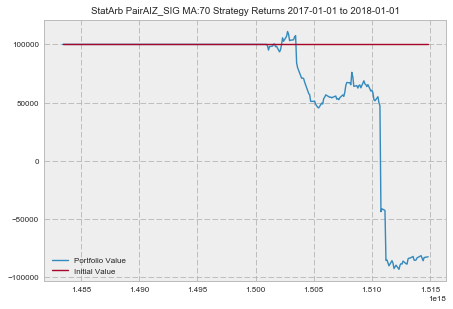

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:28: FutureWarning: pd.rolling_cov is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=71).cov(other=<Series>)
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: FutureWarning: pd.rolling_var is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=71,center=False).var()


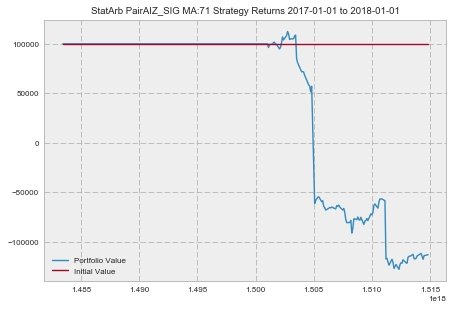

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:28: FutureWarning: pd.rolling_cov is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=72).cov(other=<Series>)
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: FutureWarning: pd.rolling_var is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=72,center=False).var()


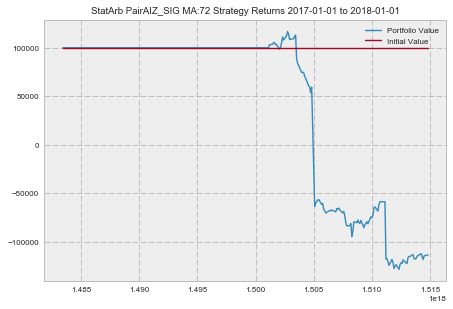

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:28: FutureWarning: pd.rolling_cov is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=73).cov(other=<Series>)
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: FutureWarning: pd.rolling_var is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=73,center=False).var()


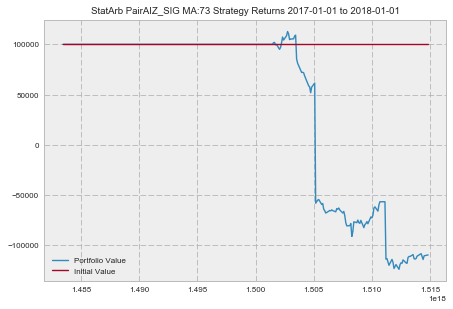

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:28: FutureWarning: pd.rolling_cov is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=74).cov(other=<Series>)
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: FutureWarning: pd.rolling_var is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=74,center=False).var()


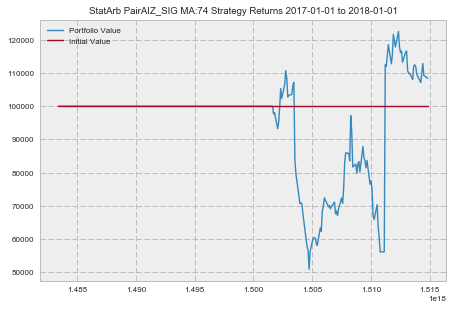

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:28: FutureWarning: pd.rolling_cov is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=75).cov(other=<Series>)
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: FutureWarning: pd.rolling_var is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=75,center=False).var()


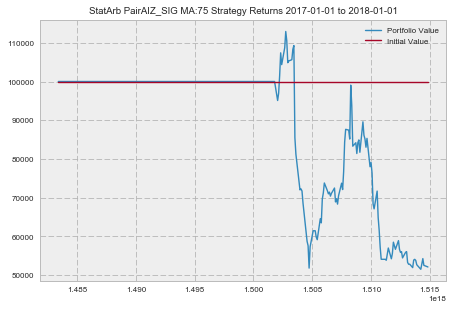

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:28: FutureWarning: pd.rolling_cov is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=76).cov(other=<Series>)
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: FutureWarning: pd.rolling_var is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=76,center=False).var()


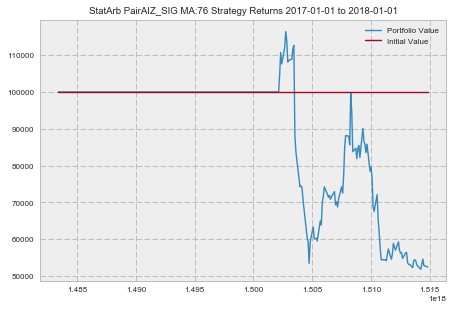

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:28: FutureWarning: pd.rolling_cov is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=77).cov(other=<Series>)
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: FutureWarning: pd.rolling_var is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=77,center=False).var()


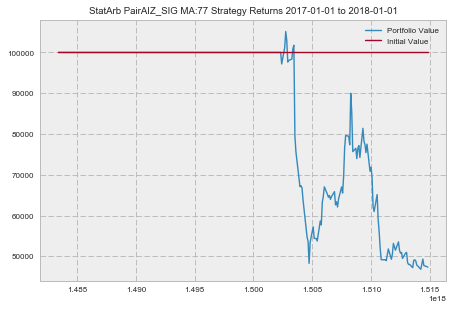

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:28: FutureWarning: pd.rolling_cov is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=78).cov(other=<Series>)
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: FutureWarning: pd.rolling_var is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=78,center=False).var()


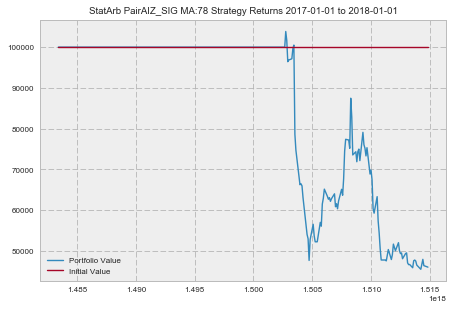

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:28: FutureWarning: pd.rolling_cov is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=79).cov(other=<Series>)
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: FutureWarning: pd.rolling_var is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=79,center=False).var()


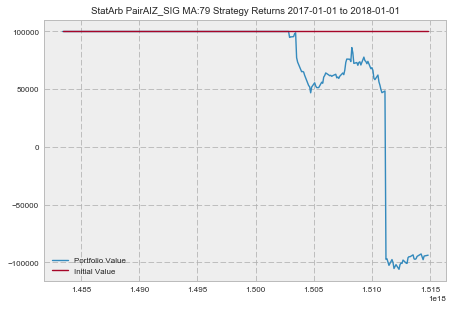

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:28: FutureWarning: pd.rolling_cov is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=80).cov(other=<Series>)
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: FutureWarning: pd.rolling_var is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=80,center=False).var()


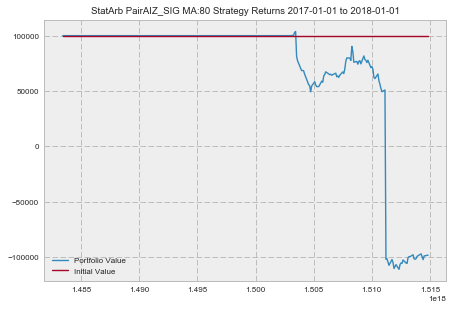

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:28: FutureWarning: pd.rolling_cov is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=81).cov(other=<Series>)
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: FutureWarning: pd.rolling_var is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=81,center=False).var()


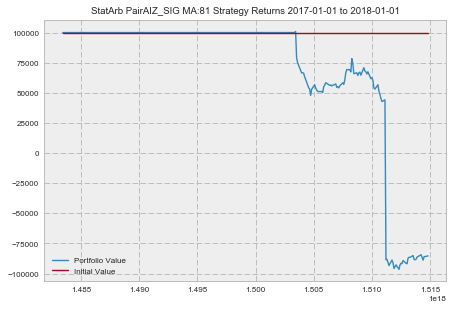

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:28: FutureWarning: pd.rolling_cov is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=82).cov(other=<Series>)
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: FutureWarning: pd.rolling_var is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=82,center=False).var()


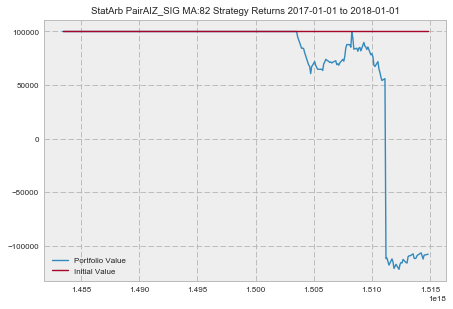

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:28: FutureWarning: pd.rolling_cov is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=83).cov(other=<Series>)
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: FutureWarning: pd.rolling_var is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=83,center=False).var()


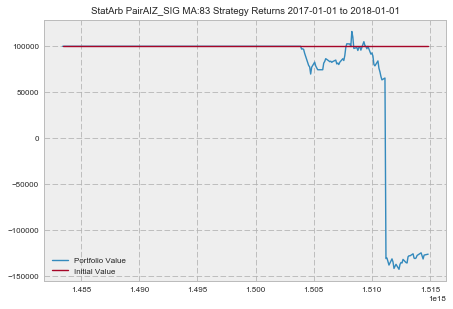

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:28: FutureWarning: pd.rolling_cov is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=84).cov(other=<Series>)
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: FutureWarning: pd.rolling_var is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=84,center=False).var()


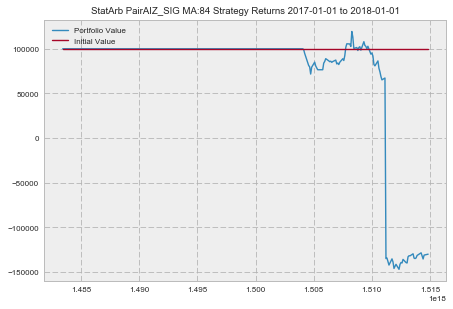

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:28: FutureWarning: pd.rolling_cov is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=85).cov(other=<Series>)
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: FutureWarning: pd.rolling_var is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=85,center=False).var()


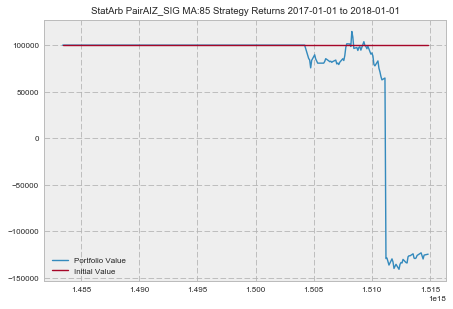

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:28: FutureWarning: pd.rolling_cov is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=86).cov(other=<Series>)
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: FutureWarning: pd.rolling_var is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=86,center=False).var()


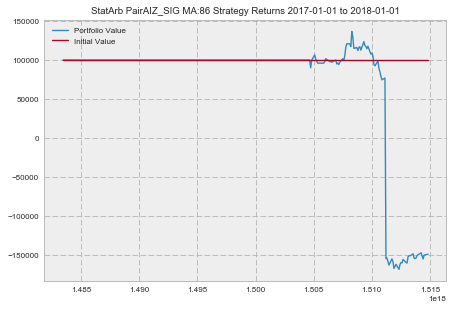

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:28: FutureWarning: pd.rolling_cov is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=87).cov(other=<Series>)
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: FutureWarning: pd.rolling_var is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=87,center=False).var()


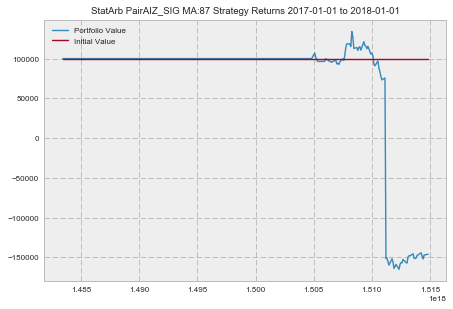

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:28: FutureWarning: pd.rolling_cov is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=88).cov(other=<Series>)
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: FutureWarning: pd.rolling_var is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=88,center=False).var()


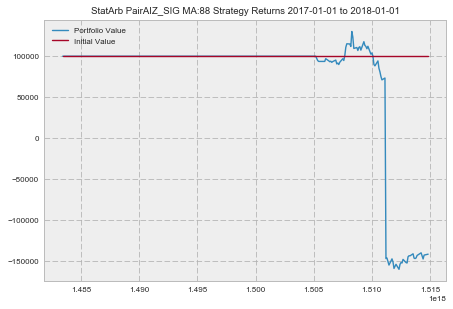

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:28: FutureWarning: pd.rolling_cov is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=89).cov(other=<Series>)
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: FutureWarning: pd.rolling_var is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=89,center=False).var()


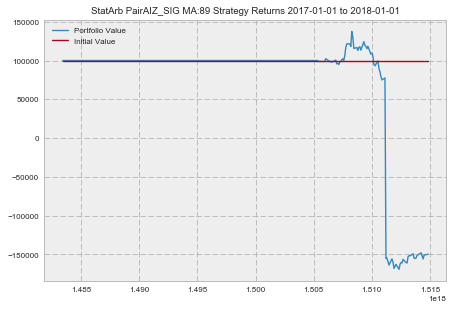

In [28]:
optimize_strategy_lookback(40,90,cointegrated[0][0],cointegrated[0][1])

Okay, let's recap what we've just completed. We wrote a method that allows us to create every possible pair combination of the stocks that were in Cluster 0 from our earlier K-Means series. After finding all possible combinations, we passed in those combinations into another function we built that performs the ADF test on  those possible pair combinations and returns those that are cointegrated. Since getting the pairs that are cointegrated, we've written another method to view the performance of each pair prior to us assembling our portfolio and we also created a method to optimize our lookback. Based on the results from our  optimize_strategy_lookback analysis, we will use 57 as our lookback.

Now we can create our portfolio of statistical arbitrage strategies. We'll create another method that will allow us to iterate over our cointegrated pairs, create a statarb strategy with those pairs, and store the returns. 

In [29]:
def create_portfolio_return(cointegrated_pairs):
    returns=pd.DataFrame()
    retsList=[]
    for pair in cointegrated_pairs:
        test=statarb(eval(pair[0]),eval(pair[1]),57,-1.5,1.5,57,start,end)
        test.create_spread()
        test.generate_signals()
        test.create_returns(100000, '%s_%s'%(pair[0].upper(),pair[1].upper()))
        
        retsList.append([test.portfolio['Portfolio Value']])
        returns['Portfolio Value'+str(pair)]=test.portfolio['Portfolio Value']
        #returns['Total Value']=returns['Portfolio Value'+str(pair)]
    return returns

Now let's use our create_portfolio_returns function to create our portfolio returns. We'll store our function in a variable so that we can access our returns DataFrame.

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:28: FutureWarning: pd.rolling_cov is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=57).cov(other=<Series>)
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: FutureWarning: pd.rolling_var is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=57,center=False).var()


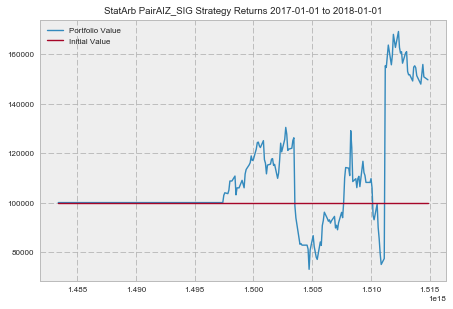

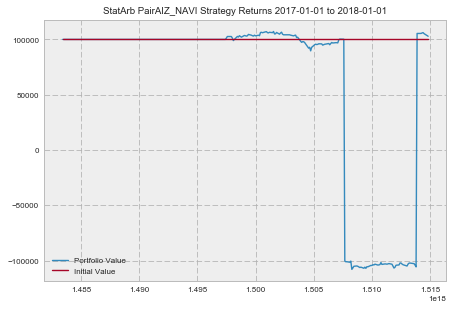

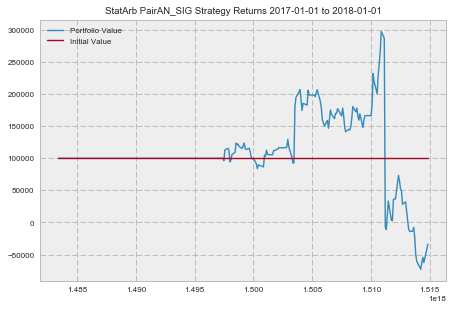

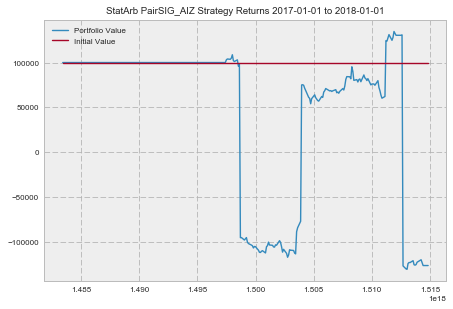

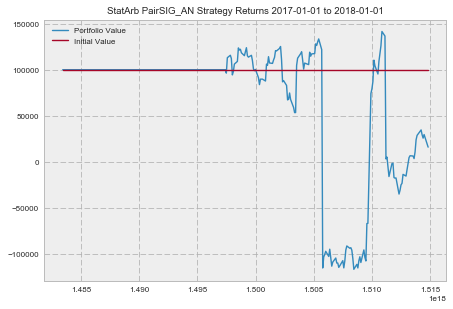

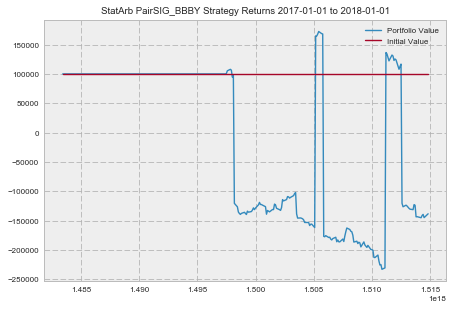

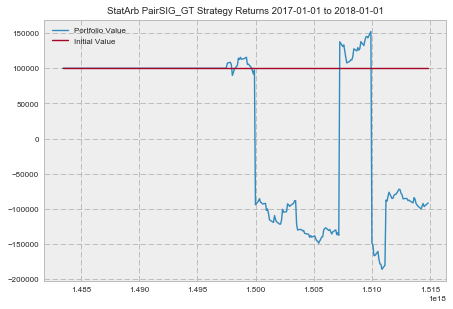

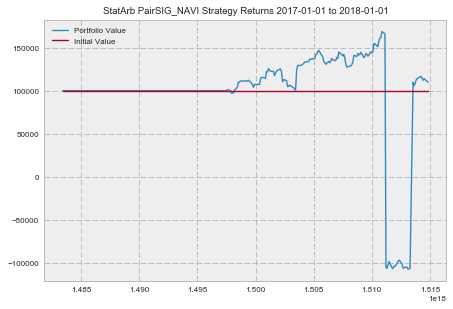

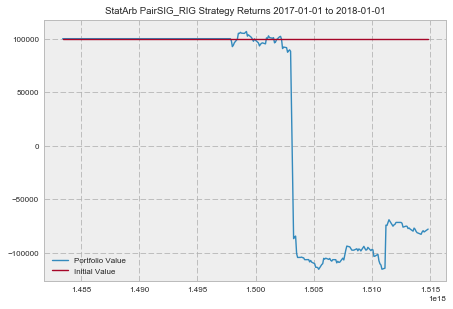

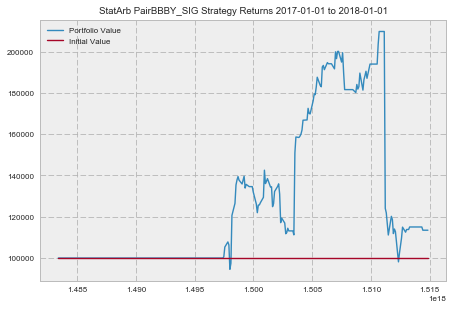

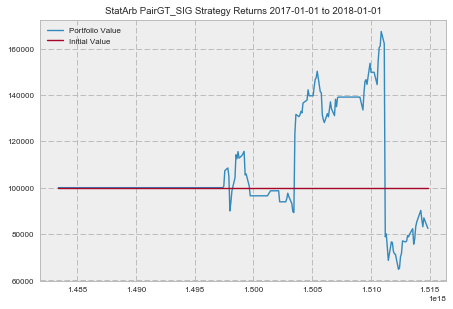

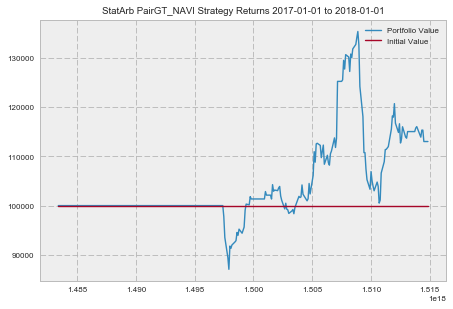

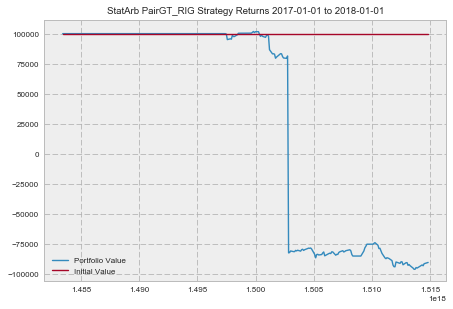

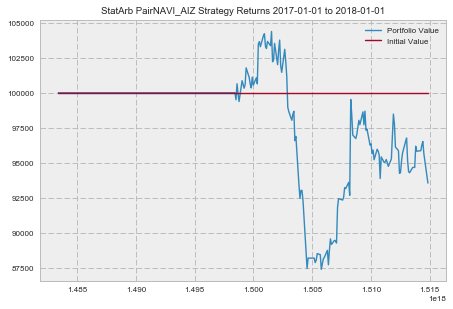

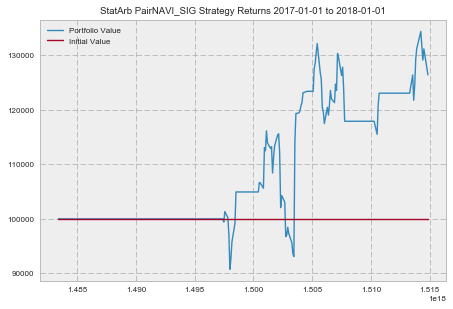

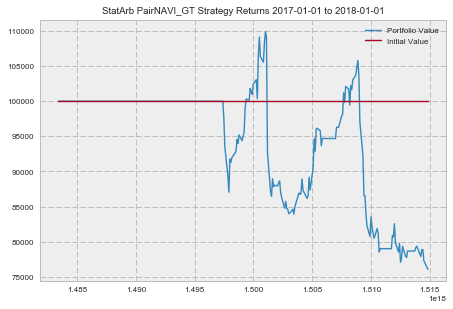

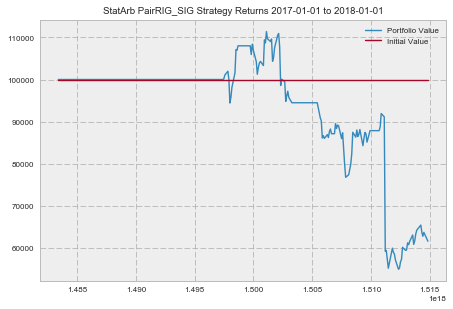

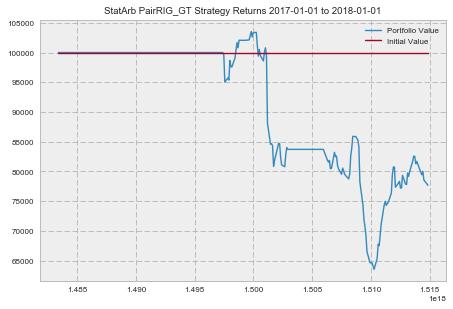

In [30]:
portfolio=create_portfolio_return(cointegrated)

Okay. Now that we have our returns from each of our strategies, let's take a look at our portfolio dataframe.

In [31]:
#looking at the head of our portfolio df
portfolio.head()

,"Portfolio Value['aiz', 'sig']","Portfolio Value['aiz', 'navi']","Portfolio Value['an', 'sig']","Portfolio Value['sig', 'aiz']","Portfolio Value['sig', 'an']","Portfolio Value['sig', 'bbby']","Portfolio Value['sig', 'gt']","Portfolio Value['sig', 'navi']","Portfolio Value['sig', 'rig']","Portfolio Value['bbby', 'sig']","Portfolio Value['gt', 'sig']","Portfolio Value['gt', 'navi']","Portfolio Value['gt', 'rig']","Portfolio Value['navi', 'aiz']","Portfolio Value['navi', 'sig']","Portfolio Value['navi', 'gt']","Portfolio Value['rig', 'sig']","Portfolio Value['rig', 'gt']"
Date,,,,,,,,,,,,,,,,,,
2017-01-03,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0
2017-01-04,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0
2017-01-05,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0
2017-01-06,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0
2017-01-09,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0


Now that we have our portfolio dataframe with returns from each strategy, we can create our total portfolio value column. After checking the length of our columns, we find that we have 18 different pair columns. We could 1) manually initialize the Total Value column by adding all these up ourself, or we could 2) solve this problem programmatically, save a lot of time, and even have some code we can store in a function and reuse later. Let's go with #2. We'll write some logic that will allow us to initialize our Total Value column as the sum of all of our individual pair's portfolio values.

In [32]:
#creating a copy of our portfolio dataframe
portfolioCopy=portfolio.copy()

#creating Total Value column and initializing to 0
portfolioCopy['Total Value']=0

#creating a pandas Series to hold the cumulative value of each row
rets=pd.Series(index=portfolioCopy.index)

#iterating over each row
for count,row in enumerate(portfolioCopy.iterrows()):
    #iterating over each column within each row
    for count2,column in enumerate(row):
        #storing sum of each column within each row into rets at same location
        rets.iloc[count]=np.sum(column)
        
#storing the returns series into the Total Value column in our dataframe        
portfolioCopy['Total Value']=rets
       

Now that we've programmatically initialized our Total Value column, let's take a look at the head of our dataframe.

In [33]:
portfolioCopy.head()

,"Portfolio Value['aiz', 'sig']","Portfolio Value['aiz', 'navi']","Portfolio Value['an', 'sig']","Portfolio Value['sig', 'aiz']","Portfolio Value['sig', 'an']","Portfolio Value['sig', 'bbby']","Portfolio Value['sig', 'gt']","Portfolio Value['sig', 'navi']","Portfolio Value['sig', 'rig']","Portfolio Value['bbby', 'sig']","Portfolio Value['gt', 'sig']","Portfolio Value['gt', 'navi']","Portfolio Value['gt', 'rig']","Portfolio Value['navi', 'aiz']","Portfolio Value['navi', 'sig']","Portfolio Value['navi', 'gt']","Portfolio Value['rig', 'sig']","Portfolio Value['rig', 'gt']",Total Value
Date,,,,,,,,,,,,,,,,,,,
2017-01-03,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,1.8e+06
2017-01-04,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,1.8e+06
2017-01-05,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,1.8e+06
2017-01-06,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,1.8e+06
2017-01-09,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,1.8e+06


We can see that our Total Value column is now equal to the sum of all of our individual pair columns.

# Creating Our Monte Carlo and VaR

Now we're ready to calculate our Value at Risk. We'll only use the first 10 months of our returns to avoid lookahead bias. The purpose of this is that we are going to use our VaR to establish the lower bound of our losses with 95% confidence so that we can create labels or a class with different return intervals that represent some percentage of our tail risk. We wouldn't want to use all of our data as our VaR, or worst expected daily loss with 95% confidence, would be based on all of our returns and thus when we used our LDA model to predict a certain degree of tail risk, our prediction would be based on having already seen the returns and tail risk, that we want to predict. This would greatly skew our results. The first 10 months corresponds to an 80/20 train-test split that we will use to build our LDA model.

Let's begin by initializing some of our parameters. We'll add our Returns column to our dataframe and then manually slice out the first 10months and create our parameters.

In [73]:
#adding return column to our portfolioCopy dataframe
portfolioCopy['Returns']=portfolioCopy['Total Value'].pct_change()

#slicing out first 10 months of our data
first10=portfolioCopy['Returns']['2017-01-01':'2017-10-31']                 
                      
#initializing our parameters
test_range=300
beginning_value=portfolioCopy['Total Value'][0]
mu=first10.mean()
sigma=first10.std()
days=202
name='StatArb Portfolio'

Before moving ahead, let's briefly review our parameters. Our test_range is the number of iterations that we will do. We have kept this number low for this illustration, but in practice the number will be much higher. Our beginning_value is the initial value of our portfolio. Our mu is the mean return of our portfolio over the first 10 months and our sigma is the standard deviation of our portfolio over the first 10 months. Days represent the length of our simulation period. We have included a name parameter  which will be passed into our Monte Carlo function for plotting purposes.

Let's create our Monte Carlo function.

In [35]:
def monte_carlo(initial_portfolio_value,days,mu,sigma,asset_name):
    '''
    PARAMETERS
    ##########
    initial_portolio_value - some starting value for strategy or portfolio
    days- the amount of time to run MC over (i.e. 252 for one year)
    mu- mean of asset or strategy
    sigma- volatility/standard deviation of asset or strategy
    asset_name- the name of strategy/asset as a string you want to appear on chart
    dt- time delta(i.e. 1/days)
    '''
    dt=1/days
    
    #creating price array
    Portfolio_Value=np.zeros(days)
    Portfolio_Value[0]=initial_portfolio_value
    
    shock=np.zeros(days)
    drift=np.zeros(days)
    
    for x in range(1,days):
        #calculate shock
        shock[x]=np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        #calculate drift
        drift[x]=mu*dt
        #calculate portfolio value
        Portfolio_Value[x]=Portfolio_Value[x-1]+(Portfolio_Value[x-1]*(drift[x]+shock[x]))
        
    return Portfolio_Value

Now that we have our Monte Carlo function, let's pass it into a loop to simulate over our sample period.

In [50]:
plots=pd.DataFrame()
for count,i in enumerate(range(0,test_range)):
        
    values=monte_carlo(beginning_value,days,mu,sigma,name)
    plots['Value'+str(count)]=values

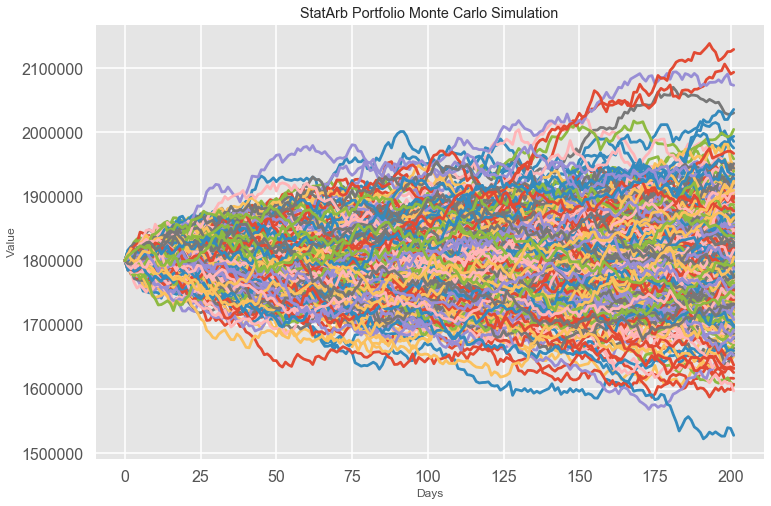

In [74]:
with plt.style.context(['seaborn-poster','ggplot']):

    plt.figure(figsize=(12,8))
    plt.plot(plots)
    plt.xlabel('Days')
    plt.ylabel('Value')
    plt.title('%s Monte Carlo Simulation'%(name))

    




Our Monte Carlo Simulation denotes a portfolio low around 1.5 million USD. Recall that we initialize each strategy with 100k USD and had 18 different pairs, thus setting our initial portfolio value at 1.8 million USD. Now that we have computed our Monte Carlo, let's generate our VaR via a histogram.

In [70]:
#creating histogram VaR
trials=np.zeros(test_range)
np.set_printoptions(threshold=7)
hist=pd.DataFrame()
for count,value in enumerate(range(0,test_range)):
    trials[count]=monte_carlo(beginning_value,days,mu,sigma,name)[days-1]
    
    hist['Value'+str(count)]=trials
    

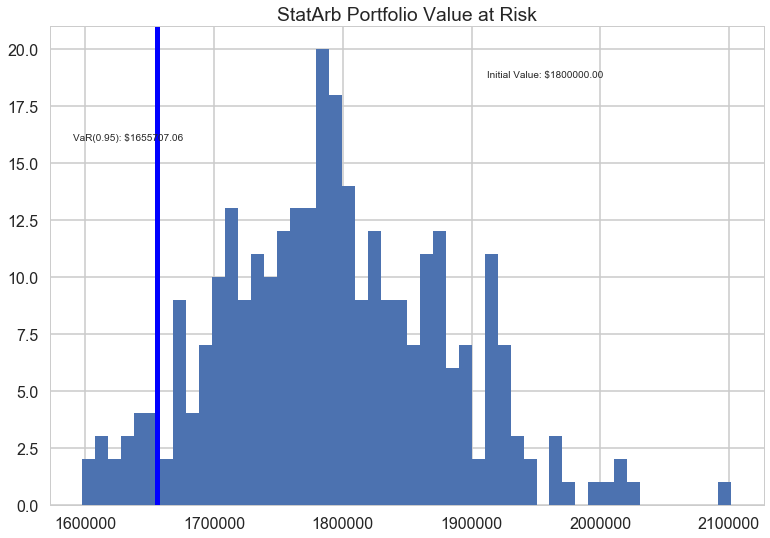

In [75]:
#plotting histogram
#setting 5% quantile
q=np.percentile(trials,5)

with plt.style.context(['seaborn-poster']):
    plt.hist(trials, bins=50)
    #showing starting value
    plt.figtext(0.6,0.8,s='Initial Value: $%.2f' %(beginning_value) )
    #annotating tail
    plt.figtext(0.15,0.7,"VaR(0.95): $%.2f" %(q))
    plt.axvline(x=q,linewidth=5,color='b')
    plt.title('StatArb Portfolio Value at Risk')



We have just completed our VaR analysis. We began by creating a Monte Carlo simulation. Our Monte Carlo showed a portfolio value low just above 1.5million USD. We then used Monte Carlo to create a histogram and get our Value at Risk with 95% Confidence. We can verify this portfolio value by printing our q variable.

In [76]:
#printing out VaR threshold
q

1655707.0639159915

We can see that based on this analysis, our VaR is 1.66million USD. We can now build on this analysis by using LDA to predict the probability of a specific loss within the tail risk identified by our Monte Carlo VaR analysis.

# Building Our LDA Model

At this point we have tested each pair combination in Cluster 0 from our K-Means series for cointegration and identified those that were cointegrated. We've constructed our portfolio of Statistical Arbitrage strategies and conducted a Monte Carlo VaR analysis. Based on our risk analysis, we learned that with 95% confidence, our portfolio shouldn't fall beneath 1.66 million.

Our initial portfolio value was 1.8 million USD. A decline to 1.66 million USD denotes a 7.7% decline in our portfolio value. While having this information can assist us in managing our portfolio, what we are most concerned with is what happens 5% of the time when our portfolio could possibly fall beneath this 1.66 million.

To improve our portfolio risk management, we will use LDA to predict the probability of our portfolio falling within some threshold within our tail risk region. We can see from our histogram that our analysis has our lower bound at 1.60 million USD. This portfolio value denotes an 11% drawdown. We will set our maximum drawdown at the midpoint of our VaR and lower bound. This amounts to 1.63 million and a drawdown of 9%. This is the maximum exposure that we are willing to take in our portfolio.

To ensure that we cap our losses at a maximum of 9%, we would like to be able to predict the probability of exceeding this threshold. We will use LDA to address this concern.

We will train our model over the same period that we used for our Monte Carlo analysis, the first 10 months of our sample. We will need to add a binary class that denotes whether or not we have exceeded our maximum exposure. We will also need to compute our explanatory variables or features which will be used to predict the odds of breaching our max exposure.

We will use two lags of returns as well as the volatility of the broader market as our features.

Let's import the S&P index, compute its volatility over the period and add it to our portfolioCopy dataframe.

In [79]:
index=pdr.get_data_yahoo('^GSPC',start,end)

Let's check the head of our index data.

In [80]:
index.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,2251.570068,2263.879883,2245.129883,2257.830078,2257.830078,3770530000
2017-01-04,2261.600098,2272.820068,2261.600098,2270.750000,2270.750000,3764890000
2017-01-05,2268.179932,2271.500000,2260.449951,2269.000000,2269.000000,3761820000
2017-01-06,2271.139893,2282.100098,2264.060059,2276.979980,2276.979980,3339890000
2017-01-09,2273.590088,2275.489990,2268.899902,2268.899902,2268.899902,3217610000


We'll compute the index returns and volatility and them to the dataframe.

In [83]:
index['Returns']=index['Close'].pct_change()

In [84]:
#computing the index volatlity
index['Volatility']=index['Returns'].rolling(window=5).std()

Now let's take another look at our index data.

In [85]:
index.head()

,Open,High,Low,Close,Adj Close,Volume,Returns,Volatility
Date,,,,,,,,
2017-01-03,2251.570068,2263.879883,2245.129883,2257.830078,2257.830078,3770530000,NaN,NaN
2017-01-04,2261.600098,2272.820068,2261.600098,2270.750000,2270.750000,3764890000,0.005722,NaN
2017-01-05,2268.179932,2271.500000,2260.449951,2269.000000,2269.000000,3761820000,-0.000771,NaN
2017-01-06,2271.139893,2282.100098,2264.060059,2276.979980,2276.979980,3339890000,0.003517,NaN
2017-01-09,2273.590088,2275.489990,2268.899902,2268.899902,2268.899902,3217610000,-0.003549,NaN


Let's review our portfolioCopy dataframe.

In [86]:
portfolioCopy.head()

,"Portfolio Value['aiz', 'sig']","Portfolio Value['aiz', 'navi']","Portfolio Value['an', 'sig']","Portfolio Value['sig', 'aiz']","Portfolio Value['sig', 'an']","Portfolio Value['sig', 'bbby']","Portfolio Value['sig', 'gt']","Portfolio Value['sig', 'navi']","Portfolio Value['sig', 'rig']","Portfolio Value['bbby', 'sig']","Portfolio Value['gt', 'sig']","Portfolio Value['gt', 'navi']","Portfolio Value['gt', 'rig']","Portfolio Value['navi', 'aiz']","Portfolio Value['navi', 'sig']","Portfolio Value['navi', 'gt']","Portfolio Value['rig', 'sig']","Portfolio Value['rig', 'gt']",Total Value,Returns
Date,,,,,,,,,,,,,,,,,,,,
2017-01-03,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,1.8e+06,NaN
2017-01-04,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,1.8e+06,0.0
2017-01-05,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,1.8e+06,0.0
2017-01-06,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,1.8e+06,0.0
2017-01-09,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,1.8e+06,0.0


Now we can create our lagged returns columns and add our index volatility columns to our data frame.

In [87]:
#creating our lagged returns columns
portfolioCopy['Lag1']=portfolioCopy['Returns'].shift(1)
portfolioCopy['Lag2']=portfolioCopy['Returns'].shift(2)

#adding our index volatility column
portfolioCopy['Index Volatility']=index['Volatility']

Let's check the head of our dataframe.


Let's first fill NaN values with 0. This will be benefical when we get ready to fit our model

In [89]:
portfolioCopy.fillna(0)

,"Portfolio Value['aiz', 'sig']","Portfolio Value['aiz', 'navi']","Portfolio Value['an', 'sig']","Portfolio Value['sig', 'aiz']","Portfolio Value['sig', 'an']","Portfolio Value['sig', 'bbby']","Portfolio Value['sig', 'gt']","Portfolio Value['sig', 'navi']","Portfolio Value['sig', 'rig']","Portfolio Value['bbby', 'sig']",...,"Portfolio Value['navi', 'aiz']","Portfolio Value['navi', 'sig']","Portfolio Value['navi', 'gt']","Portfolio Value['rig', 'sig']","Portfolio Value['rig', 'gt']",Total Value,Returns,Lag1,Lag2,Index Volatility
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.800000e+06,0.000000,0.000000,0.000000,0.000000
2017-01-04,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.800000e+06,0.000000,0.000000,0.000000,0.000000
2017-01-05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.800000e+06,0.000000,0.000000,0.000000,0.000000
2017-01-06,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.800000e+06,0.000000,0.000000,0.000000,0.000000
2017-01-09,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.800000e+06,0.000000,0.000000,0.000000,0.000000
2017-01-10,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.800000e+06,0.000000,0.000000,0.000000,0.003656
2017-01-11,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.800000e+06,0.000000,0.000000,0.000000,0.002861
2017-01-12,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.800000e+06,0.000000,0.000000,0.000000,0.003061
2017-01-13,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.800000e+06,0.000000,0.000000,0.000000,0.002665


Now we can add columns for our threshold and create our response column.

In [90]:
#adding our threshold value
portfolioCopy['Threshold']=1630000

#adding our response column
portfolioCopy['Tail Risk']=np.where(portfolioCopy['Total Value']<portfolioCopy['Threshold'],'Yes','No')

Now that we have our threshold and response added, let's re-check our dataframe.

In [91]:
portfolioCopy.head()

,"Portfolio Value['aiz', 'sig']","Portfolio Value['aiz', 'navi']","Portfolio Value['an', 'sig']","Portfolio Value['sig', 'aiz']","Portfolio Value['sig', 'an']","Portfolio Value['sig', 'bbby']","Portfolio Value['sig', 'gt']","Portfolio Value['sig', 'navi']","Portfolio Value['sig', 'rig']","Portfolio Value['bbby', 'sig']",...,"Portfolio Value['navi', 'gt']","Portfolio Value['rig', 'sig']","Portfolio Value['rig', 'gt']",Total Value,Returns,Lag1,Lag2,Index Volatility,Threshold,Tail Risk
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,...,100000.0,100000.0,100000.0,1.8e+06,NaN,NaN,NaN,NaN,1630000,No
2017-01-04,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,...,100000.0,100000.0,100000.0,1.8e+06,0.0,NaN,NaN,NaN,1630000,No
2017-01-05,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,...,100000.0,100000.0,100000.0,1.8e+06,0.0,0.0,NaN,NaN,1630000,No
2017-01-06,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,...,100000.0,100000.0,100000.0,1.8e+06,0.0,0.0,0.0,NaN,1630000,No
2017-01-09,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,...,100000.0,100000.0,100000.0,1.8e+06,0.0,0.0,0.0,NaN,1630000,No


Great! Now we are ready to build our LDA model. Let's start by importing the necessary libraries.

In [103]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
from sklearn.cross_validation import train_test_split

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Let's initialize our LDA model as model.

In [93]:
model=lda()

Let's split our data into training and testing sets. Note we only need 4 of the last columns that we added, namely Lag1 and 2, Index Volatility, and Tail Risk.

We'll begin by creating a dataframe of only the relevant columns from our portfolioCopy dataframe.

In [101]:
sample_data=pd.DataFrame(dict(Lag1=portfolioCopy['Lag1'],Lag2=portfolioCopy['Lag2'],IndexVolatility=portfolioCopy['Index Volatility'],TailRisk=portfolioCopy['Tail Risk']))

We've just created a sample_data dataframe that contains the relevant data from our portfolioCopy dataframe. Let's check it.

In [102]:
sample_data.head()

,IndexVolatility,Lag1,Lag2,TailRisk
Date,,,,
2017-01-03,NaN,NaN,NaN,No
2017-01-04,NaN,NaN,NaN,No
2017-01-05,NaN,0.0,NaN,No
2017-01-06,NaN,0.0,0.0,No
2017-01-09,NaN,0.0,0.0,No


Let's fill these NaN values now as they will pose a problem when we get ready to fit our model.

In [107]:
#filling NaN values with 0
sample_data.fillna(0)

,IndexVolatility,Lag1,Lag2,TailRisk
Date,,,,
2017-01-03,0.000000,0.000000,0.000000,No
2017-01-04,0.000000,0.000000,0.000000,No
2017-01-05,0.000000,0.000000,0.000000,No
2017-01-06,0.000000,0.000000,0.000000,No
2017-01-09,0.000000,0.000000,0.000000,No
2017-01-10,0.003656,0.000000,0.000000,No
2017-01-11,0.002861,0.000000,0.000000,No
2017-01-12,0.003061,0.000000,0.000000,No
2017-01-13,0.002665,0.000000,0.000000,No


Now let's create our training and testing sets. Recall that we will be doing an 80/20 split.

In [111]:
#creating our features space by dropping our response from our data
X=sample_data.drop('TailRisk',axis=1)
#creating our response by initializing y as TailRisk
y=sample_data['TailRisk']


#creating our 80/20 split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20)

Now that we've split our data, let's train our model.

In [113]:
#fitting our model to our data
model.fit(X_train.fillna(0),y_train.fillna(0))

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

Now that we have fit our model to our data, let's use it to predict our tail risk and our results.

In [114]:
#passing in our new labels; those not yet seen by our model
predictions=model.predict(X_test)

Now that we have our predictions, we can check how accurate our model is at predicting the likelihood of our portfolio exceeding our max exposure.

Let's import our confusion matrix and classification report from sklearn.

In [115]:
from sklearn.metrics import classification_report, confusion_matrix

Now we're ready to print out our reports.

In [139]:
#printing out confusion matrix
print(confusion_matrix(y_test,predictions))

#printing out classification report
print(classification_report(y_test,predictions)) # target_names=response_names))

[[ 0 31]
 [ 1 19]]
             precision    recall  f1-score   support

         No       0.00      0.00      0.00        31
        Yes       0.38      0.95      0.54        20

avg / total       0.15      0.37      0.21        51



Before we get into the results of our model, let's briefly ensure we understand what the prior code is doing. We began by creating a dataframe of only our predictors (i.e. Lag1,Lag2,IndexVolatility) and our response or label(i.e. TailRisk). We then split our data into training and testing sets, train our model using our training data(X_train or our predictors, and y_train or our responses) and then made predictions using our X_test set or the predictors that our model hadn't yet seen. Thus, we pass in our y_test set, or the actual repsonses vs our predicted responses and check our model's accuracy.

In [144]:
true_negative,false_negative,false_positive,true_positive=confusion_matrix(y_test,predictions).ravel()

In [145]:
print('Interpreting Confusion Matrix')
print('Actual NO & Predicted NO:', true_negative)
print('Actual YES & Predicted NO:', false_negative)
print('Actual NO & Predicted YES:', false_positive)
print('Actual YES & Predicted YES:', true_positive)

Interpreting Confusion Matrix
Actual NO & Predicted NO: 0
Actual YES & Predicted NO: 31
Actual NO & Predicted YES: 1
Actual YES & Predicted YES: 19


Let's check our understanding. Our confusion matrix can be read from left to right with the columns being Actual No and Actual Yes and the rows being Predicted No and Predicted Yes. What the confusion matrix shows is the number of times our portfolio didn't breached our exposure and we predicted that it wouldn't,denoted by the 0 in the matrix; It shows us how many times our portfolio breached our exposure and we predicted that it wouldn't, denoted by 31 in the matrix. It shows us how many times our portfolio didn't breach our exposure and we predicted that it would, denoted by 1 in the matix. And it shows how many times our portfolio breached our exposure and we predicted that it would, denoted by 19 in the matrix.

Our classification report is providing us with supporting information but in a different format. We know for instance that the total amount of times that our portfolio actually breached our exposure was 50 times. We can see this by simply adding up our Actual Yes column 31+19=50. We also know that we correctly predicted a breach of our exposure 19 times. We can divide this by the total instances in which our exposure was breach, 19/50=38; and we get the exact same thing in the precision column of the   classification report at the Yes row. This shows that our precision, or our model's ability to correctly identify when our portfolio would breach our exposure limits was 38% of the time.

The parameters we use play an important role in our model's ability to correctly classify our observations. Recall that in the above example we used two lags of our returns as well as the volatility of the index. There are different considerations within model development that must be assessed. We won't address them here, but what we will do is see how our precision might change if we only make predictions based on the volatility of the index.

Let's create a new training and testing set, using only the index volatility as our predictor.

In [146]:
sample_data_2=sample_data.copy()

Let's check the head of our 2nd sample data to ensure its validity.

In [147]:
sample_data_2.head()

,IndexVolatility,Lag1,Lag2,TailRisk
Date,,,,
2017-01-03,NaN,NaN,NaN,No
2017-01-04,NaN,NaN,NaN,No
2017-01-05,NaN,0.0,NaN,No
2017-01-06,NaN,0.0,0.0,No
2017-01-09,NaN,0.0,0.0,No


Okay. Now we can fill NaN values with 0, drop our 2 lagged columns, and perform our train and testing splits.

In [149]:
#filling NaNs
sample_data_2.fillna(0)

#dropping our Lagged columns
sample_data_2.drop(['Lag1','Lag2'],inplace=True,axis=1)

#initializing our X and y vairables
X_2=sample_data_2.drop('TailRisk',axis=1)
y_2=sample_data_2['TailRisk']

#creating our training and testing sets 
X_train_2,X_test_2,y_train_2,y_test_2=train_test_split(X_2,y_2,test_size=0.20)

Let's check our X and y.

In [150]:
X_2.head()

,IndexVolatility
Date,
2017-01-03,NaN
2017-01-04,NaN
2017-01-05,NaN
2017-01-06,NaN
2017-01-09,NaN


In [151]:
y_2.head()

Date
2017-01-03    No
2017-01-04    No
2017-01-05    No
2017-01-06    No
2017-01-09    No
Name: TailRisk, dtype: object

Okay, now that we've confirmed the validity of our data, let's fit our new model using only index volatility.

In [154]:
#creating a new instance of LDA object
new_model=lda()

#fitting our model on our training data
new_model.fit(X_train_2.fillna(0),y_train_2)


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

We now have our model fitted to our data using only the index volatility as a predictor. We can now use our model to make predictions as before and review our confusion matrix and classification report.

In [155]:
#making predictions
predictions_2=new_model.predict(X_test_2)

In [157]:
#creating our new confusion matrix and classication reports
print('Creating Confusion Matrix and Classification Report for P=1, Volatility')
print(confusion_matrix(y_test_2,predictions_2))
print(classification_report(y_test_2,predictions_2))

Creating Confusion Matrix and Classification Report for P=1, Volatility
[[ 8 14]
 [14 15]]
             precision    recall  f1-score   support

         No       0.36      0.36      0.36        22
        Yes       0.52      0.52      0.52        29

avg / total       0.45      0.45      0.45        51



We can see that our ability to predict breaches of our exposure limits has increased from 38% to 52% simply by altering the parameters that we used for predicting. Before we used Lag1 and Lag2 as well as the 5period rolling standard deviation of the index, or volatility. This time we only used volatility of the index and doing so has improved our ability to predict breaches of our exposure limit.

Naturally, there are additional things that we can do to further improve upon this but we won't cover that in this post. Of key interest is 1) our ability to predict breaches of our max exposure within our tail risk and 2) false negatives, or when we predict that our portfolio will not breach our maximum exposure limit and it does. There are often cases when we would place a greater level of importance on prediction accuracy within one class versus another. In this example, our ability to correctly predict breaches of our exposure limit and limit false negatives are far more important than our ability to predict when we will not breach our limit and when we falsely state that we will. This is because our greatest risk is when we go beyond the limit we've set within our tail risk. 

# Let's Recap

We've covered quite a bit in this post. To begin, we got an understanding of Linear Discriminant Analysis and what's actually happening under the hood when we use an API to create a model. This analysis is very important as a solid understanding of what the model is actually doing will play a key role in your ability to optimize the model and also choose the most appropriate model for your problem. The abstraction of APIs can easily cause you to underestimate how important this information is.

After gaining an understanding of what LDA seeks to achieve, we then used data from our K-Means series to build a StatArb portfolio. We used Cluster 0 which contained 9 different stocks. We learned how to create every possible pair combination of these stocks and check them for cointegration using the Augmented Dickey Fuller Test. We also learned how to parse out those pairs that were cointegrated and use our statarb class to create a quantitative portfolio.

After building our portfolio, we learned how to conduct a risk analysis using Monte Carlo simulation to compute our Value at Risk. We discussed a key limitation in VaR and devised a means to improve upon our VaR analysis. We identified our VaR threshold and then set a maximum exposure for our portfolio. With the max exposure, we were then able to create a class response of when our porfolio exceeded this maximum desired drawdown. 

We then created explanatory or predictor variables to predict when our portfolio might exceed our maximum tail risk threshold. We learned that the parameters we use in our model play an important role in our model's precision. We saw our model's precision increase from 38% to 52% simply by changing the parameters that we used.

# Challenge: See If You Can Apply This Analysis to Intraday Trading


We've gone through how we can analyze our portfolio risk and a means to manage it. We applied this analysis to our total portfolio value. This analysis can be used to manage our VaR from a daily perspective. Challenge yourself and see how you can apply the logic we learned here to managing risk on an intraday timeframe.